### Chargement des packages
**NB** : il peut être nécessaire de restart le kernel après les deux installations

In [4]:
pip install pymc==5.18.2

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 102.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 115.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 94.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 61.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 98.1 MB/s eta 0:00:00
  Created wheel for cons: filename=cons-0.4.6-py3-none-any.whl size=9094 sha256=1ef45f5581d158a3369b2198246dc83fa1b2f5704ae3e3b5bb8cbec02b5bda95
  Stored in directory: /home/onyxia/.cache/pip/wheels/91/0c/f7/7ba4ffbf0db6bf272bee59789131f6ec2d26966307a3054267
  Created wheel for logical-unification: filename=logical_unification-0.4.6-py3-none-any.whl size=13912 sha256=c6abd1c1c4c49c2e7cbc6bd373fca353c202d5ec61c19314b16ea76c36f2fd5d
  Stored in 

In [5]:
pip install ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 99.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
from scipy.stats import dirichlet, norm
import random

import arviz as az
import matplotlib.pyplot as plt
import pymc as pm
import ipywidgets

%config InlineBackend.figure_format = 'retina'
RANDOM_SEED = 8927
np.random.seed(RANDOM_SEED)
az.style.use("arviz-darkgrid")

## Chargement des données

In [2]:
# N=55 pays, longueur T=30 ans (entre 1995 et 2024), normalisé entre 0 et 1 (par colonne et au global)
GDP_30 = pd.read_csv('../Data preprocessing/GDP_yearly_30_colnormalized', index_col=0)
GDP_global_30 = pd.read_csv('../Data preprocessing/GDP_yearly_30_global_normalized')

In [47]:
# N=71 pays, longueur T=25 ans (entre 2000 et 2024), normalisé entre 0 et 1 (par colonne et au global)
GDP_25 = pd.read_csv('../Data preprocessing/GDP_yearly_25_colnormalized', index_col=0)
GDP_global_25 = pd.read_csv('../Data preprocessing/GDP_yearly_25_global_normalized')

In [4]:
# N=60 pays, longueur T=27 ans (entre 1998 et 2024), normalisé entre 0 et 1 (par colonne et au global)
GDP_27 = pd.read_csv('../Data preprocessing/GDP_yearly_27_colnormalized', index_col=0)
GDP_global_27 = pd.read_csv('../Data preprocessing/GDP_yearly_27_global_normalized')

In [5]:
GDP_global_27.head()

Argentina  Australia   Austria   Belgium  Bulgaria   Bolivia    Brazil  \
0   0.015091   0.040353  0.015689  0.018966  0.001303  0.000223  0.068021   
1   0.014574   0.042161  0.016277  0.019651  0.001162  0.000226  0.068341   
2   0.014459   0.043479  0.016847  0.020396  0.001227  0.000241  0.071309   
3   0.013802   0.044620  0.017069  0.020625  0.001290  0.000252  0.072368   
4   0.012267   0.046492  0.017327  0.020984  0.001387  0.000269  0.074568   

   Botswana    Canada  Switzerland  ...    Serbia  Slovakia  Slovenia  \
0  0.000000  0.059044     0.022619  ...  0.001117  0.002489  0.001340   
1  0.000032  0.062099     0.022994  ...  0.000960  0.002476  0.001428   
2  0.000049  0.065310     0.023956  ...  0.001045  0.002497  0.001500   
3  0.000060  0.066542     0.024348  ...  0.001138  0.002582  0.001556   
4  0.000093  0.068550     0.024335  ...  0.001238  0.002713  0.001618   

     Sweden  Thailand    Turkey  Taiwan, China   Uruguay  United States  \
0  0.017908  0.009008  0.024030       0.012430  0.001309       0.569929   
1  0.018629  0.009443  0.023227       0.013293  0.001276       0.597243   
2  0.019546  0.009881  0.024881       0.014157  0.001244       0.621610   
3  0.019853  0.010234  0.023401       0.013953  0.001181       0.627553   
4  0.020310  0.010887  0.024925       0.014740  0.001060       0.638232   

   South Africa  
0      0.012723  
1      0.013038  
2      0.013602  
3      0.013980  
4      0.014512  

[5 rows x 60 columns]

In [7]:
GDP_27.head()

Argentina  Australia   Austria   Belgium  Bulgaria   Bolivia  \
Year                                                                   
1998.0   0.465062   0.000000  0.000000  0.000000  0.078101  0.000000   
1999.0   0.419842   0.043460  0.075248  0.065662  0.000000  0.002935   
2000.0   0.409848   0.075163  0.148157  0.136995  0.036144  0.021531   
2001.0   0.352416   0.102593  0.176508  0.158882  0.070884  0.034685   
2002.0   0.218249   0.147604  0.209524  0.193231  0.124303  0.054367   

          Brazil  Botswana    Canada  Switzerland  ...    Serbia  Slovakia  \
Year                                               ...                       
1998.0  0.000000  0.000000  0.000000     0.000000  ...  0.099174  0.004087   
1999.0  0.006361  0.058236  0.071799     0.027176  ...  0.000000  0.000000   
2000.0  0.065312  0.089006  0.147254     0.096914  ...  0.053878  0.006259   
2001.0  0.086347  0.108492  0.176202     0.125390  ...  0.112951  0.031499   
2002.0  0.130058  0.168572  0.223374     0.124394  ...  0.176114  0.070471   

        Slovenia    Sweden  Thailand    Turkey  Taiwan, China   Uruguay  \
Year                                                                      
1998.0  0.000000  0.000000  0.000000  0.015166       0.000000  0.193577   
1999.0  0.059256  0.056431  0.036479  0.000000       0.043589  0.169978   
2000.0  0.107926  0.128310  0.073154  0.031237       0.087227  0.146532   
2001.0  0.145398  0.152396  0.102717  0.003282       0.076927  0.100792   
2002.0  0.187079  0.188187  0.157387  0.032078       0.116652  0.012801   

        United States  South Africa  
Year                                 
1998.0       0.000000      0.000000  
1999.0       0.063511      0.032060  
2000.0       0.120167      0.089510  
2001.0       0.133988      0.127994  
2002.0       0.158818      0.182160  

[5 rows x 60 columns]

In [2]:
# Série différenciée + normalisée pour N=71 pays, longueur T=25 ans (entre 2000 et 2024)
GDP_25_diff_norm = pd.read_csv('../Data preprocessing/GDP_yearly_25_diff_normalized', index_col=0)

In [3]:
# Série taux de croissance pour N=71 pays, longueur T=25 ans (entre 2000 et 2024)
GDP_25_growth = pd.read_csv('../Data preprocessing/GDP_yearly_25_growth', index_col=0)

## Premier exemple avec p(yi∣θk) gaussienne 
(yi gaussienne de moyenne θk)

Les paramètres theta ne doivent pas être en dimension T + update du theta à reprendre avec la posterior

In [7]:
# --- Étape 1: Initialisation --- Distribution a priori
def initialize_model(y, K, e0=1.0):
    """
    Initialise les paramètres du modèle.
    y: Liste des séries temporelles [N x T]
    K: Nombre de groupes
    e0: Hyperparamètre du Dirichlet
    """
    N, T = y.shape
    eta = dirichlet.rvs([e0] * K, size=1).flatten()  # Dirichlet prior for eta
    S = np.random.choice(K, size=N)  # Random initial classification
    theta = [np.random.randn(T) for _ in range(K)]  # Paramètres pour chaque groupe
    return eta, S, theta

In [16]:
# --- Étape 2: Échantillonnage de S ---
def sample_S(y, theta, eta):
    """
    Échantillonne les indicateurs de groupe S.
    """
    N = len(y)
    K = len(theta)
    S = np.zeros(N, dtype=int)
    for i in range(N):
        probs = [
            norm.pdf(y[i], loc=theta[k]).prod() * eta[k]  # Probabilité conditionnelle p(yi∣θk) gaussienne
            for k in range(K)
        ]
        probs = np.array(probs)
        probs /= probs.sum()  # Normalisation
        S[i] = np.random.choice(K, p=probs)  # Échantillonnage
    return S

Remarque : Dans la fonction précédente, on fait l'hypothèse d'indépendance conditionnelle, c'est-à-dire que l'on suppose les dimensions de 𝑦[𝑖] indépendantes étant donné 𝜃[𝑘]. Cela permet de calculer la probabilité jointe comme le produit des densités marginales.

In [17]:
# --- Étape 3: Mise à jour des paramètres ---
def update_theta(y, S, K):
    """
    Met à jour les paramètres spécifiques aux groupes (theta) en fonction des données de l'affectation actuelle.
    """
    T = y.shape[1]
    theta = []
    for k in range(K):
        group_data = y[S == k]   # Contient toutes les séries appartenant au groupe k
        if len(group_data) > 0:
            theta_k = group_data.mean(axis=0)  # Posterior mean (simple estimation)
        else:
            theta_k = np.random.randn(T)  # Cas sans données : valeur aléatoire d'une distribution gaussienne standard
        theta.append(theta_k)
    return theta

def update_eta_ignorance_structure(S, K, e0=1.0):
    """
    Met à jour les probabilités a priori des paramètres eta (structure d'ignorance) influencées  par la distribution actuelle des affectations S.
    """
    counts = np.bincount(S, minlength=K) + e0  # Comptes augmentés par le prior (nombre d'observations assignées à chaque groupe k + e0)
    return dirichlet.rvs(counts, size=1).flatten()

In [20]:
# --- Étape 4: MCMC ---
def mcmc(y, K, num_iter=1000, e0=1.0):
    """
    Effectue l'estimation via MCMC.
    """
    eta, S, theta = initialize_model(y, K, e0)
    for iteration in range(num_iter):
        # Échantillonnage de S
        S = sample_S(y, theta, eta)
        # Mise à jour de theta
        theta = update_theta(y, S, K)
        # Mise à jour de eta
        eta = update_eta_ignorance_structure(S, K, e0)
    return S, theta, eta

In [ ]:
# Exécution pour des données synthétiques

# Génération de données synthétiques
np.random.seed(42)
N, T, K = 100, 50, 3
true_theta = [np.random.randn(T) for _ in range(K)]
y = np.vstack([np.random.randn(1, T) + true_theta[k] for k in np.random.choice(K, N)])

# Estimation MCMC
S_est, theta_est, eta_est = mcmc(y, K, num_iter=500)

print("Classification estimée : ", S_est)
print("Paramètres des groupes : ", theta_est)
print("Paramètres eta : ", eta_est)

Classification estimée :  [1 2 0 2 1 1 0 1 2 0 2 2 1 1 1 1 1 0 2 2 2 2 1 2 0 0 2 2 0 0 1 0 1 1 1 1 1
 2 0 1 0 0 1 2 1 2 0 2 2 2 0 0 2 2 1 2 1 2 1 0 2 2 2 2 1 2 0 0 2 0 2 2 0 2
 0 1 2 1 0 1 1 0 1 1 0 1 0 1 0 0 1 1 1 2 2 2 0 1 0 2]
Paramètres des groupes :  [array([-1.43885876, -0.28508876,  0.07423943, -0.56848096, -0.06911439,
        0.84361014,  1.71529438,  0.00278895, -0.04675652, -0.21411054,
       -1.91502398, -0.17995909,  0.53696021,  2.1140656 ,  0.09221716,
        0.31718667,  0.1964794 , -1.17957364,  0.94882226,  0.83776001,
        0.85822083, -0.91832784,  1.35476824, -1.33344936,  0.48575812,
        2.03911007, -1.10031333, -0.40622436,  0.24109638, -0.6489704 ,
       -1.97050145,  0.09435958, -0.91618468,  0.39386854, -0.93195056,
        1.21101961, -0.66223164, -0.34742302,  0.88112607, -1.15063722,
        0.18146311,  1.35918336, -1.64153013,  0.34284287,  0.40648783,
        0.99553769, -1.35064288, -1.24120905,  0.54834596,  0.32916065]), array([ 0.54155319, -

In [22]:
y # à tracer 

array([[-0.34285941, -2.07690054, -0.02012467, ..., -0.55421566,
         0.70420584,  0.3653095 ],
       [ 0.01546602, -2.23205831,  0.22764107, ...,  1.28610076,
        -1.19044683, -1.39997055],
       [-0.27099921,  0.43721934, -0.96957239, ..., -0.78443008,
         1.36211272,  1.4303267 ],
       ...,
       [ 0.51450932, -1.07085069, -1.79038001, ..., -1.84184646,
        -0.20222532,  0.68043279],
       [-1.33553995, -1.58544234, -0.24076355, ..., -3.07086435,
         0.7562848 ,  1.25141375],
       [-0.98886192,  1.51990591, -0.36214154, ...,  0.70992497,
         0.58586527, -3.68414091]])

In [30]:
y.shape

(100, 50)

In [63]:
# Exécution pour des données réelles normalisées

np.random.seed(42)

# Conversion en tableau NumPy
y = GDP_global_25.values.T  # Transpose pour avoir (N, T)
print(y.shape)  

K = 3  # Nombre de clusters
num_iter = 500  # Nombre d'itérations pour le MCMC

# Estimation MCMC
S_est, theta_est, eta_est = mcmc(y, K, num_iter)

print("Classification estimée : ", S_est)
print("Paramètres des groupes : ", theta_est)
print("Paramètres eta : ", eta_est)

(69, 27)
Classification estimée :  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Paramètres des groupes :  [array([-0.3042521 , -0.11670463, -0.3473727 , -0.53600333, -0.30915443,
       -0.27934743,  0.89081317, -0.89444088,  1.9536459 , -0.66514828,
        0.86910079, -1.42708004, -0.66648318, -0.22104584, -0.86772683,
        0.57914114,  0.56361525, -0.70822635, -1.81519983,  0.62686454,
        0.07987199, -0.48536948, -0.57860071, -0.70380732,  0.84741842,
       -0.33620734,  1.37977526]), array([0.03085638, 0.06074844, 0.11206989, 0.13884558, 0.16606907,
       0.20141824, 0.25704613, 0.31076316, 0.3797597 , 0.45083692,
       0.48009911, 0.42329402, 0.47721469, 0.51991825, 0.53946059,
       0.57033192, 0.60810629, 0.64955105, 0.69165072, 0.75201168,
       0.8053718 , 0.84722232, 0.75697621, 0.88197098, 0.95204807,
       0.98845817, 0.41973416]), array([ 2.37127377,  0.66286393,  

In [ ]:
# Exécution pour des données réelles normalisées sur l'ensemble

np.random.seed(42)

# Conversion en tableau NumPy
y_global = GDP_global_30.values.T  # Transpose pour avoir (N, T)
print(y.shape)  

K = 3  # Nombre de clusters
num_iter = 500  # Nombre d'itérations pour le MCMC

# Estimation MCMC
S_est, theta_est, eta_est = mcmc(y_global, K, num_iter)

print("Classification estimée : ", S_est)
print("Paramètres des groupes : ", theta_est)
print("Paramètres eta : ", eta_est)

Classification estimée :  [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Paramètres des groupes :  [array([ 1.74169077e+00, -3.81474571e-01,  4.25480967e-01,  1.09195970e+00,
       -1.89837742e+00, -8.37492785e-01, -1.23806434e-03, -1.18768745e+00,
       -6.75776988e-01, -1.79102207e+00, -9.14564488e-01, -8.18783113e-01,
        1.62320855e+00,  6.30259872e-01, -1.36151115e+00, -5.45606038e-01,
        3.16015286e-01, -7.85183851e-01, -6.70778772e-01,  1.63083555e+00,
       -1.22885632e+00,  2.08056312e+00, -1.24419540e+00, -2.11153265e+00,
        1.62670924e+00,  2.98005680e-01, -1.55600629e-01]), array([ 3.86532725e-01, -1.44286948e+00, -5.56678995e-01,  9.53890045e-01,
       -6.86679973e-01, -7.04344431e-01,  1.15052783e+00, -5.36561176e-02,
        3.52715559e-01, -1.42268760e+00,  1.60169876e-03,  1.38842350e+00,
       -1.80436284e+00, -9.76998604e-01,  1.21490237e+00,  3.84131575e-

## Deuxième exemple avec un modèle ARMA(p, q)

1) Mise à jour des paramètres selon la posterior avec ARMA + calculer p(y_i | theta_k) pour un modèle ARMA

2) Chercher prior logit avec K > 2

3) Vérifier la posterior Dirichlet

4) Revoir estimation du nb de clusters optimal et bridge sampling

## Détermination du modèle
Pour choisir le modèle que l'on utilise pour modéliser les données, on fait d'abord plusieurs essais de modèles, sur l'ensemble du panel (overall pooling). On essaye ainsi des modèles AR(1) et AR(2), avec et sans constante. 

### Série normalisée

Computing ... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00

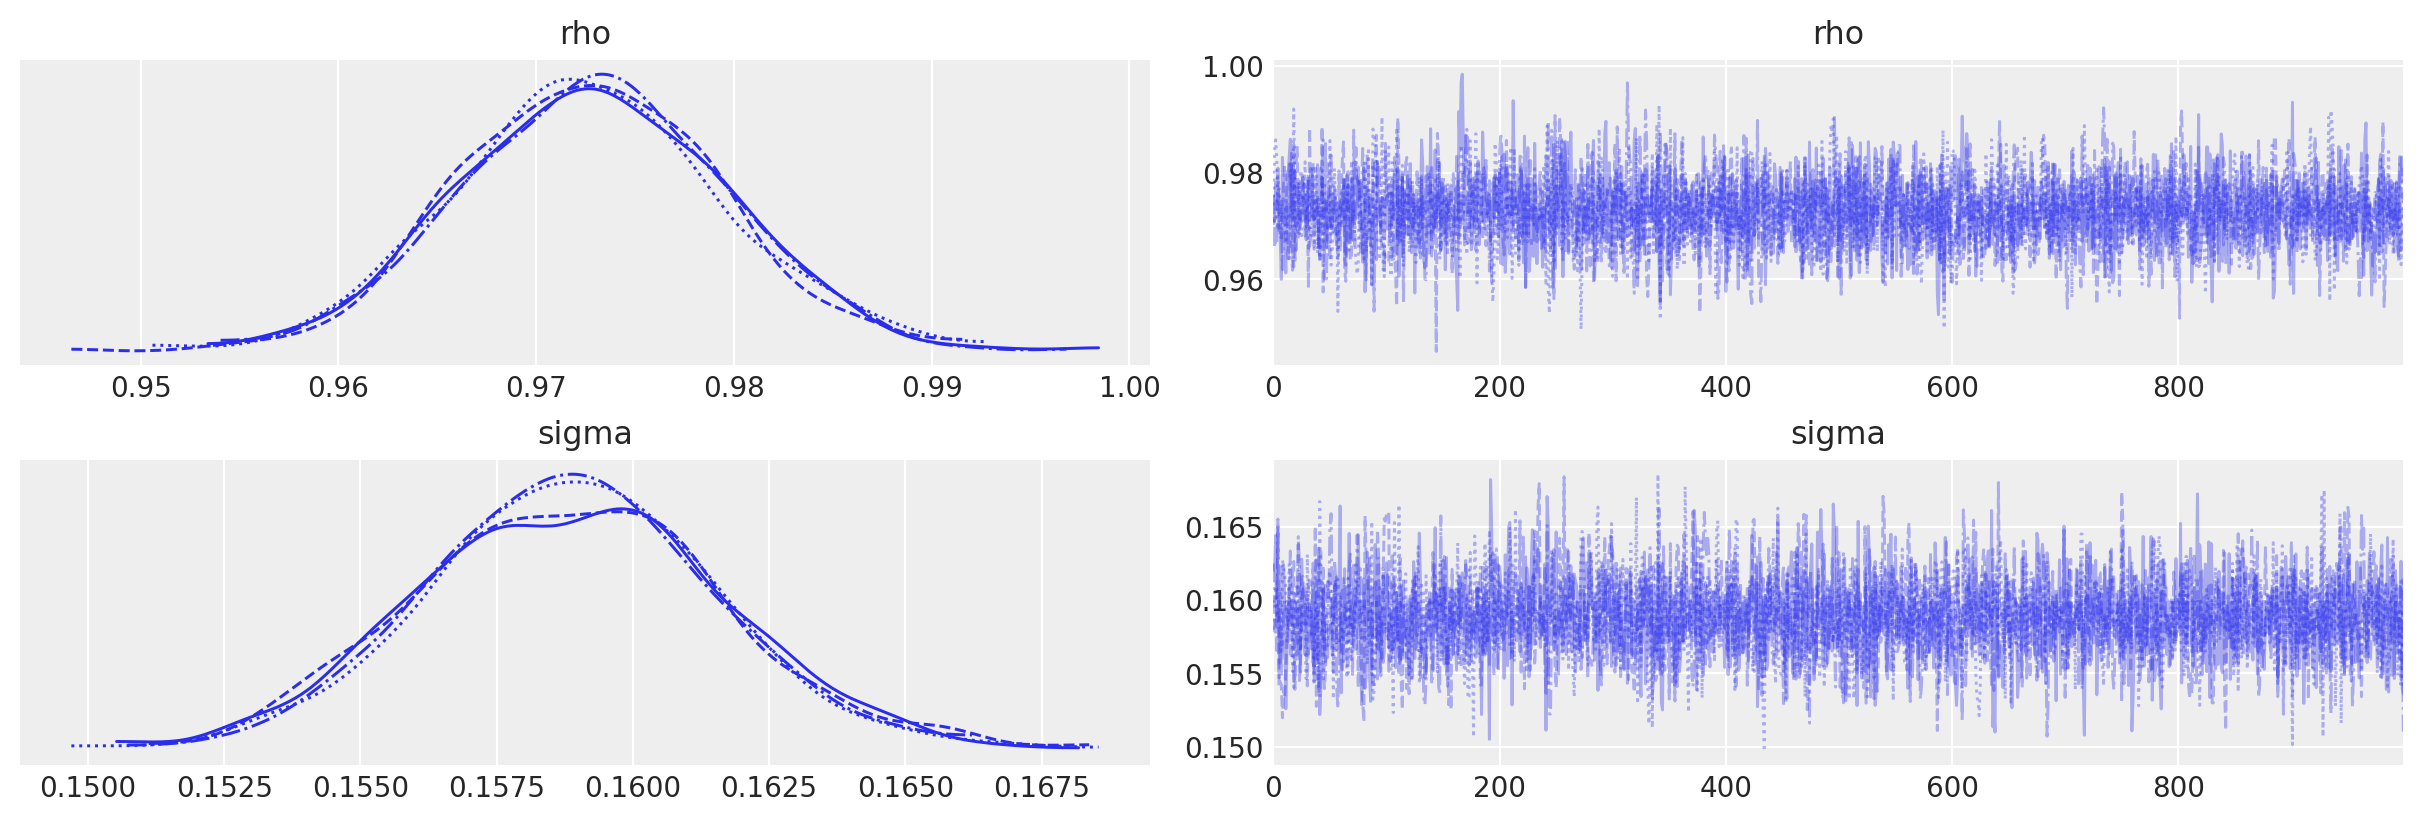

In [51]:
# AR(1) no constant
y = GDP_25.T # NB : il faut que les pays soient en lignes (df NxT)

with pm.Model() as ar1nc:
    rho = pm.Normal("rho", 0.0, 1.0, shape=1)
    sigma = pm.HalfNormal("sigma", 3)
    likelihood = pm.AR(
        "ar1nc", rho=rho, sigma=sigma, constant=False, init_dist=pm.Normal.dist(0, 10), observed=y
    )

    idata_ar1nc = pm.sample(
        1000,
        tune=2000,
        target_accept=0.9,
        random_seed=RANDOM_SEED,
    )

    idata_ar1nc.extend(pm.compute_log_likelihood(idata_ar1nc)) # calcule la log_likelihood pour chaque chain x draw x série (ar_dim_0)

az.plot_trace(
    idata_ar1nc
);

In [52]:
idata_ar1nc

Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> observed_data

In [53]:
# Stats des coefs
az.summary(idata_ar1nc)

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
rho[0]  0.973  0.007   0.961    0.986        0.0      0.0    4233.0    2515.0   
sigma   0.159  0.003   0.153    0.164        0.0      0.0    3935.0    2911.0   

        r_hat  
rho[0]    1.0  
sigma     1.0

In [55]:
# Log_likelihood sommée sur les 71 séries, moyenne entre les 4 x 1000 tirages
idata_ar1nc.log_likelihood.ar1nc.sum(["ar1nc_dim_0"]).mean(["chain","draw"]).values

array(489.33654055)

Computing ... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00

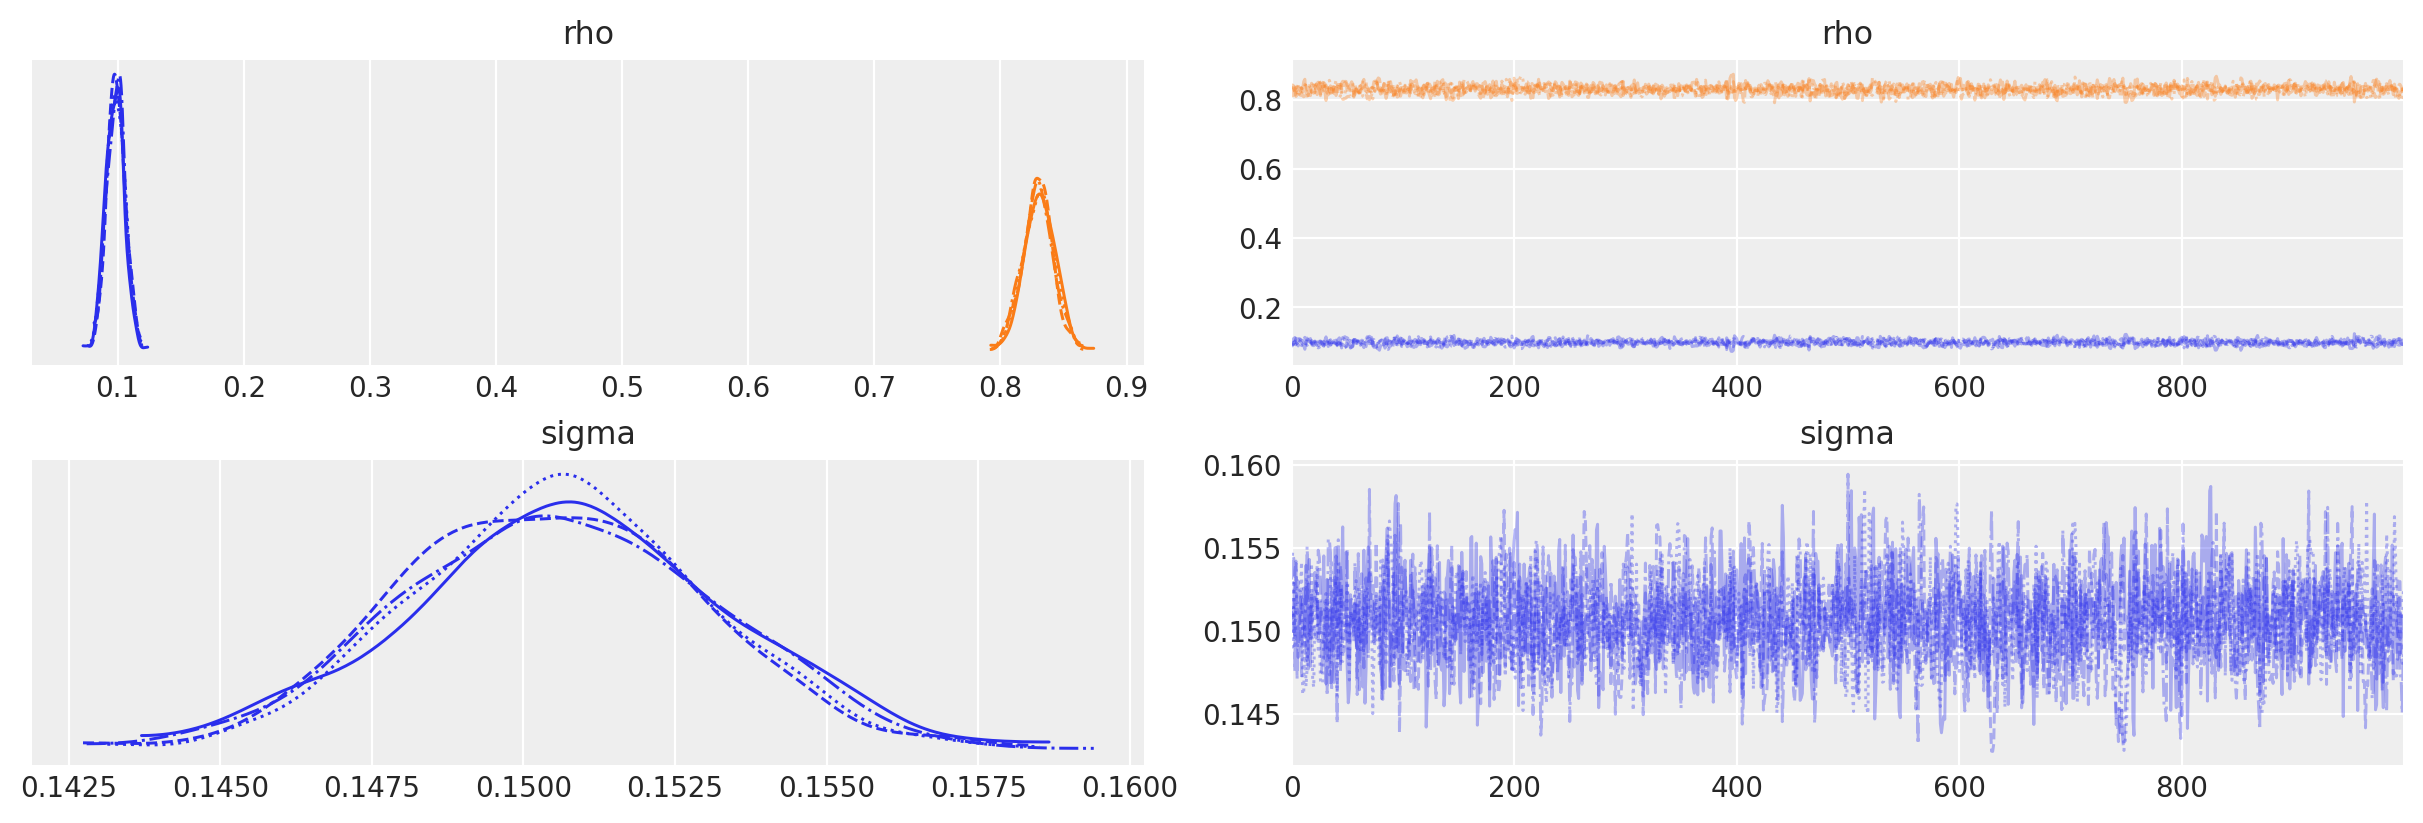

In [56]:
# AR(1) with constant
y = GDP_25.T

with pm.Model() as ar1wc:
    rho = pm.Normal("rho", 0.0, 1.0, shape=2)
    sigma = pm.HalfNormal("sigma", 3)
    likelihood = pm.AR(
        "ar1wc", rho=rho, sigma=sigma, constant=True, init_dist=pm.Normal.dist(0, 10), observed=y
    )

    idata_ar1wc = pm.sample(
        1000,
        tune=2000,
        target_accept=0.9,
        random_seed=RANDOM_SEED,
    )

    idata_ar1wc.extend(pm.compute_log_likelihood(idata_ar1wc)) # calcule la log_likelihood pour chaque chain x draw x série (ar_dim_0)

az.plot_trace(
    idata_ar1wc
);

In [57]:
# Stats des coefs
az.summary(idata_ar1wc)

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
rho[0]  0.098  0.007   0.086    0.113        0.0      0.0    1600.0    1964.0   
rho[1]  0.830  0.012   0.808    0.854        0.0      0.0    1595.0    2054.0   
sigma   0.151  0.003   0.146    0.155        0.0      0.0    2095.0    1961.0   

        r_hat  
rho[0]    1.0  
rho[1]    1.0  
sigma     1.0

In [60]:
# Log_likelihood sommée sur les 71 séries, moyenne entre les 4 x 1000 tirages
idata_ar1wc.log_likelihood.ar1wc.sum(["ar1wc_dim_0"]).mean(["chain","draw"]).values

array(579.4923035)

Computing ... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00

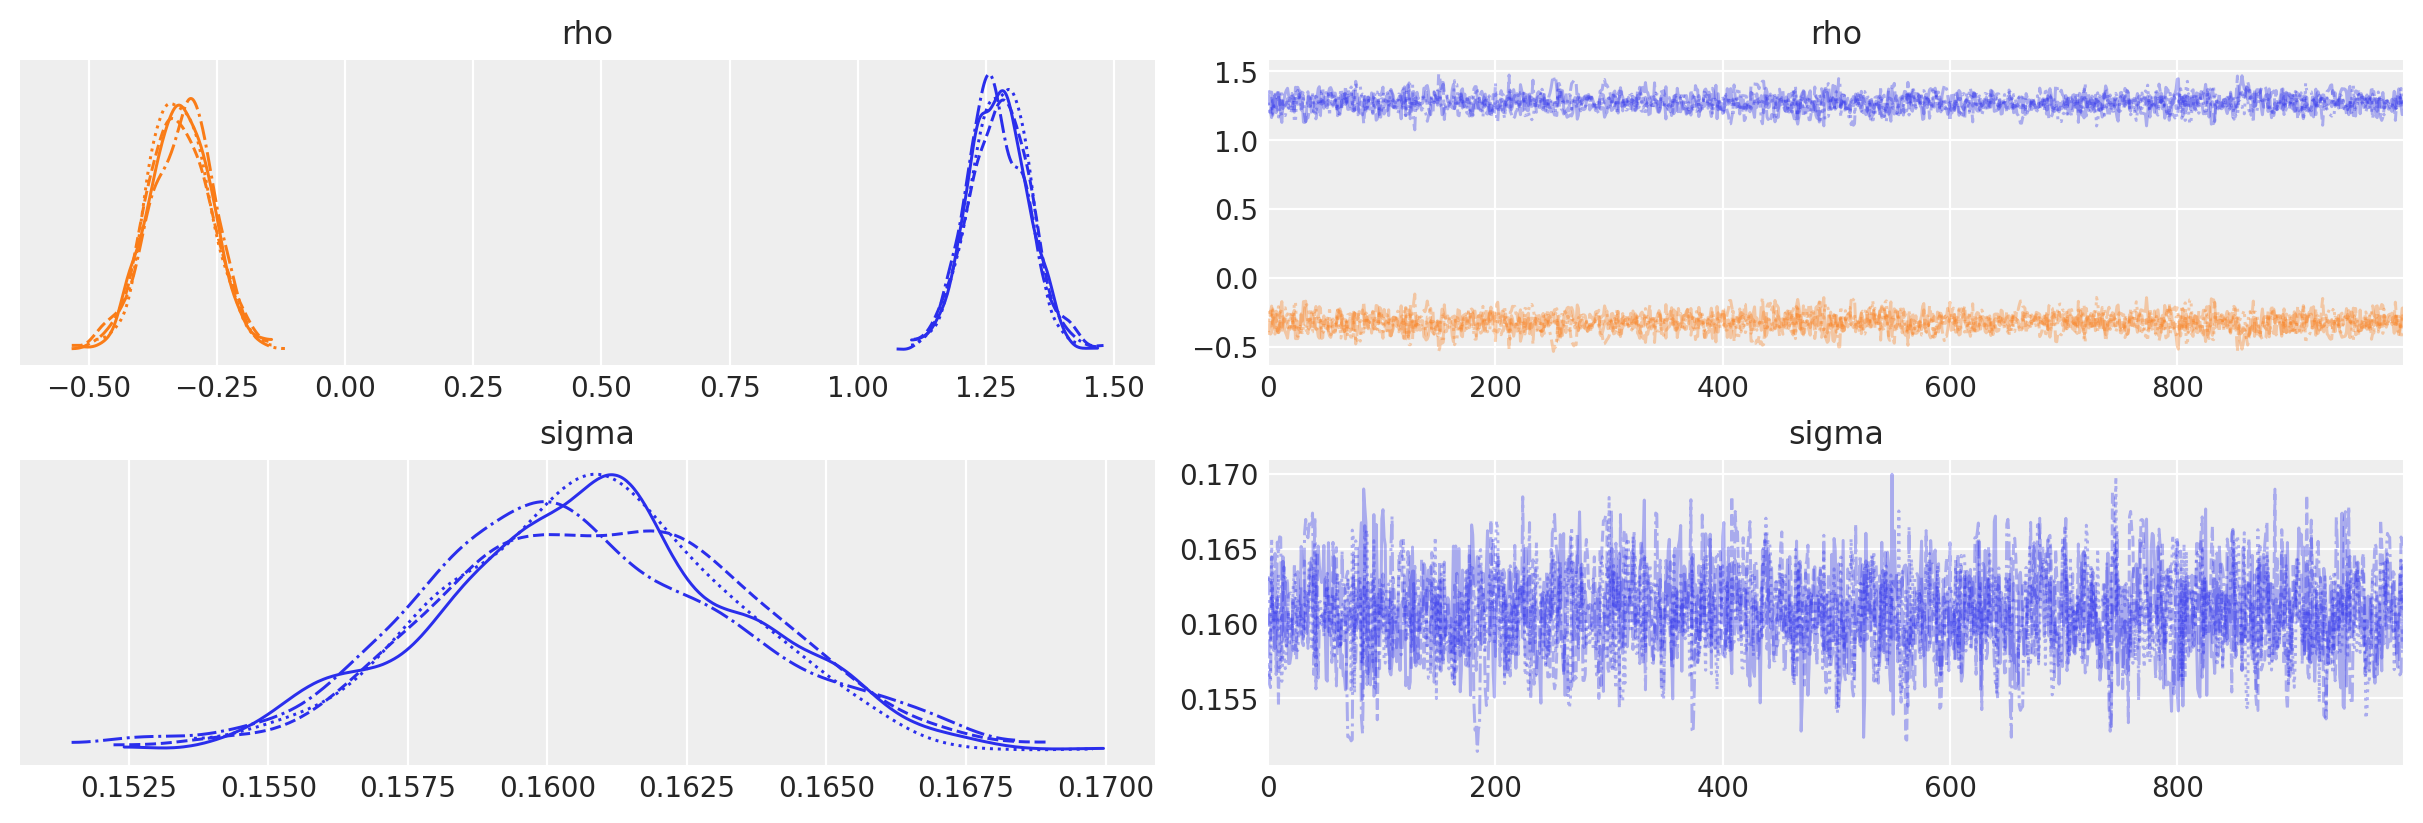

In [61]:
# AR(2) no constant
y = GDP_25.T

with pm.Model() as ar2nc:
    rho = pm.Normal("rho", 0.0, 1.0, shape=2)
    sigma = pm.HalfNormal("sigma", 3)
    likelihood = pm.AR(
        "ar2nc", rho=rho, sigma=sigma, constant=False, init_dist=pm.Normal.dist(0, 10), observed=y
    )

    idata_ar2nc = pm.sample(
        1000,
        tune=2000,
        target_accept=0.9,
        random_seed=RANDOM_SEED,
    )
    
    idata_ar2nc.extend(pm.compute_log_likelihood(idata_ar2nc)) # calcule la log_likelihood pour chaque chain x draw x série (ar_dim_0)
    
az.plot_trace(
    idata_ar2nc
);

In [62]:
# Stats des coefs
az.summary(idata_ar2nc)

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
rho[0]  1.274  0.058   1.163    1.379      0.002    0.001    1243.0    1368.0   
rho[1] -0.322  0.061  -0.427   -0.196      0.002    0.001    1255.0    1436.0   
sigma   0.161  0.003   0.156    0.166      0.000    0.000    1686.0    1807.0   

        r_hat  
rho[0]    1.0  
rho[1]    1.0  
sigma     1.0

In [63]:
# Log_likelihood sommée sur les 71 séries, moyenne entre les 4 x 1000 tirages
idata_ar2nc.log_likelihood.ar2nc.sum(["ar2nc_dim_0"]).mean(["chain","draw"]).values

array(211.76836581)

Computing ... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00

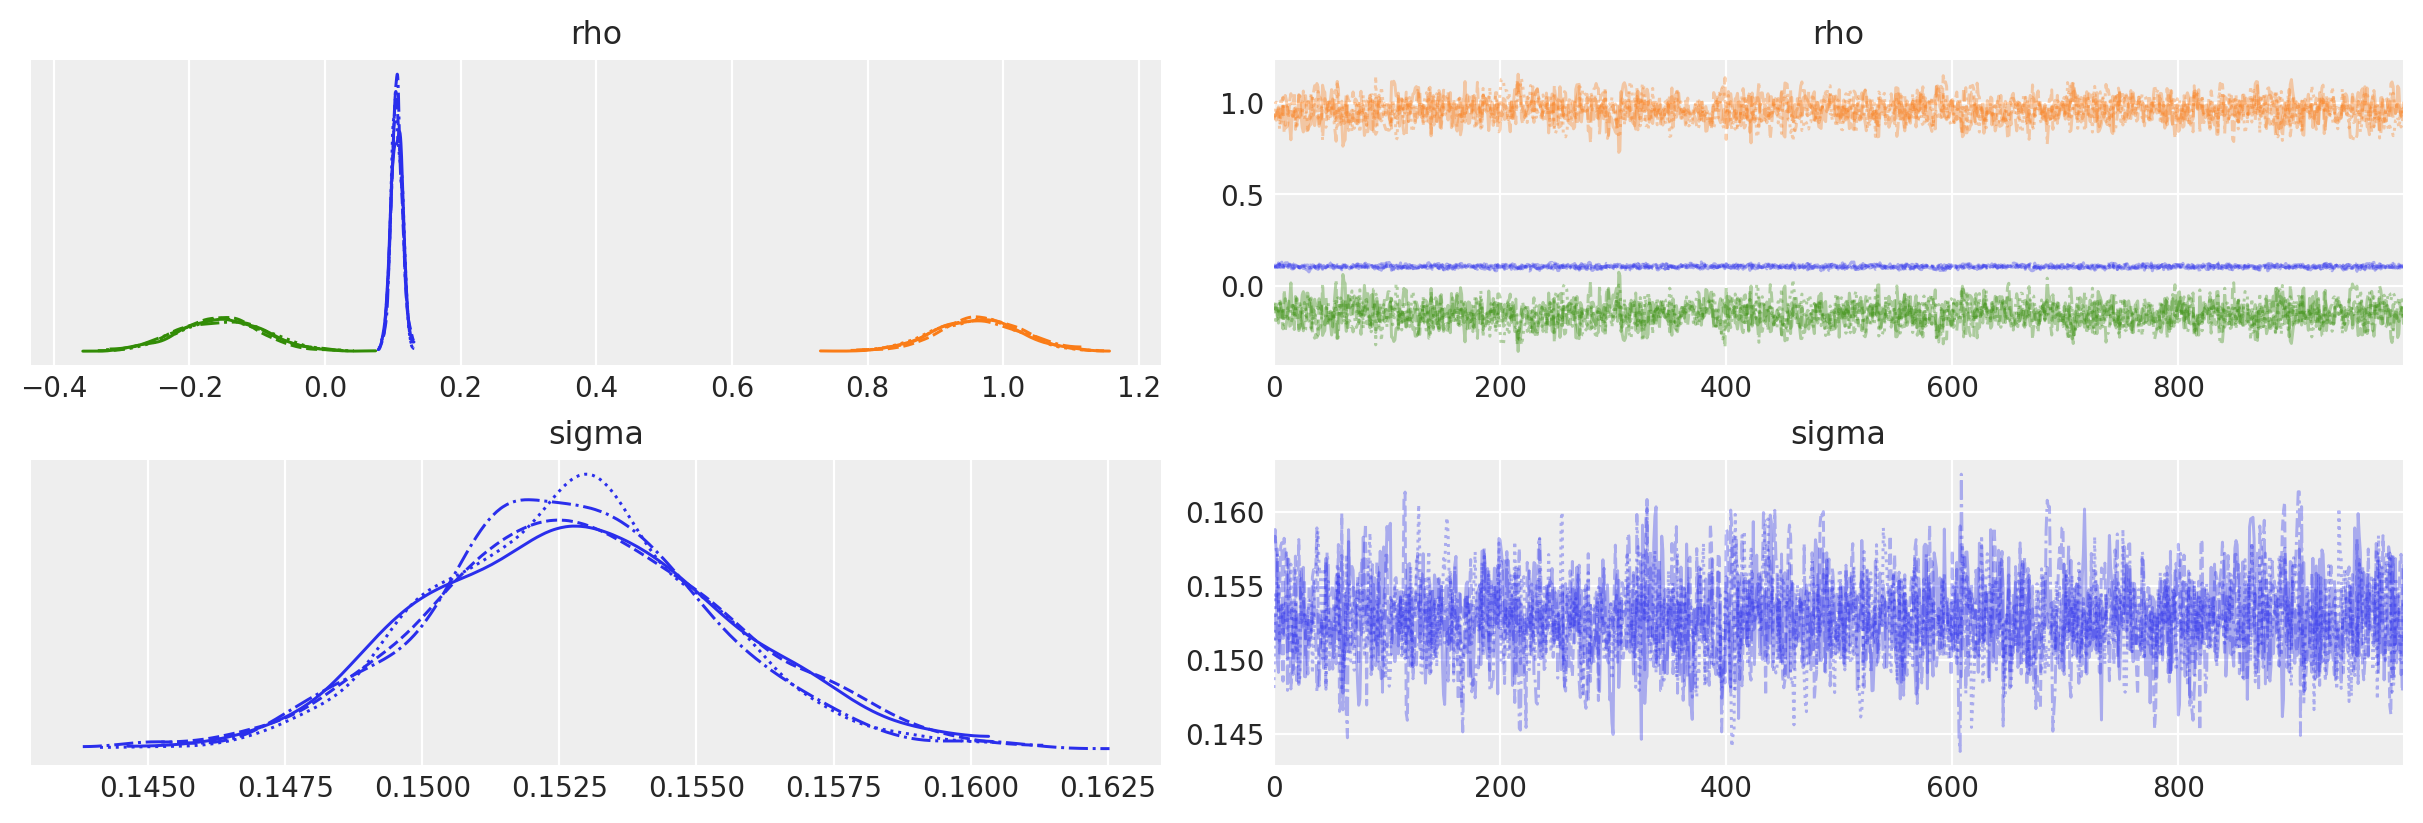

In [64]:
# AR(2) with constant
y = GDP_25.T

with pm.Model() as ar2wc:
    rho = pm.Normal("rho", 0.0, 1.0, shape=3)
    sigma = pm.HalfNormal("sigma", 3)
    likelihood = pm.AR(
        "ar2wc", rho=rho, sigma=sigma, constant=True, init_dist=pm.Normal.dist(0, 10), observed=y
    )

    idata_ar2wc = pm.sample(
        1000,
        tune=2000,
        target_accept=0.9,
        random_seed=RANDOM_SEED,
    )

    idata_ar2wc.extend(pm.compute_log_likelihood(idata_ar2wc)) # calcule la log_likelihood pour chaque chain x draw x série (ar_dim_0)
    
az.plot_trace(
    idata_ar2wc
);

In [65]:
# Stats des coefs
az.summary(idata_ar2wc)

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
rho[0]  0.106  0.008   0.090    0.121      0.000    0.000    2195.0    2124.0   
rho[1]  0.963  0.062   0.841    1.075      0.002    0.001    1340.0    1756.0   
rho[2] -0.153  0.062  -0.269   -0.038      0.002    0.001    1407.0    1695.0   
sigma   0.153  0.003   0.148    0.158      0.000    0.000    2420.0    2067.0   

        r_hat  
rho[0]    1.0  
rho[1]    1.0  
rho[2]    1.0  
sigma     1.0

In [66]:
# Log_likelihood sommée sur les 71 séries, moyenne entre les 4 x 1000 tirages
idata_ar2wc.log_likelihood.ar2wc.sum(["ar2wc_dim_0"]).mean(["chain","draw"]).values

array(293.89577252)

=> AR(2) avec constante : peu satisfaisant (coefs 1 et 2 très variants). 

=> AR(2) sans constante : de même, coefs 1 et 2 très variants. 

=> AR(1) sans constante et avec constante = OK, coefs peu variants. Log-likelihood plus élevée pour l'AR(1) avec constante.

=> Qu'est-ce qu'on choisit ? Pour l'instant un AR(1) avec constante

### Série différenciée + normalisée

Computing ... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00

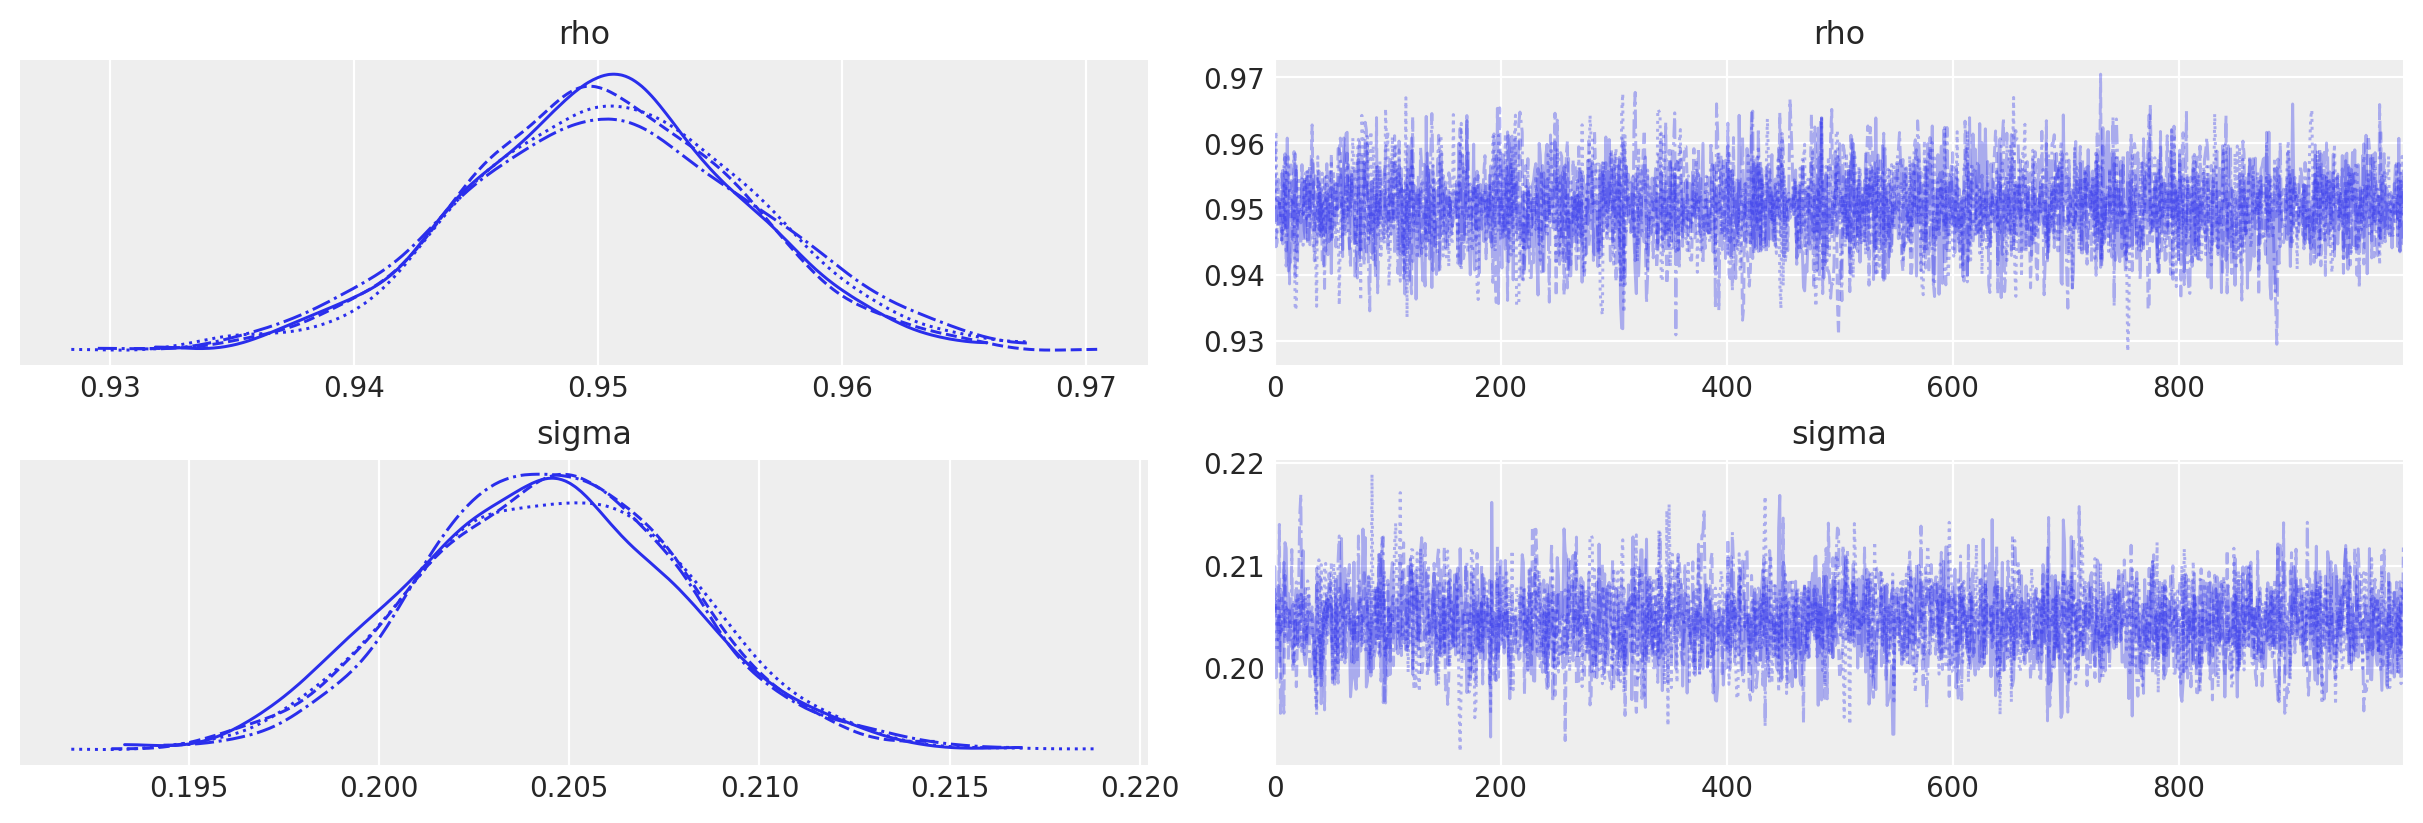

In [8]:
# AR(1) no constant
y = GDP_25_diff_norm.T # NB : il faut que les pays soient en lignes (df NxT)

with pm.Model() as ar1nc:
    rho = pm.Normal("rho", 0.0, 1.0, shape=1)
    sigma = pm.HalfNormal("sigma", 3)
    likelihood = pm.AR(
        "ar1nc", rho=rho, sigma=sigma, constant=False, init_dist=pm.Normal.dist(0, 10), observed=y
    )

    idata_ar1nc = pm.sample(
        1000,
        tune=2000,
        target_accept=0.9,
        random_seed=RANDOM_SEED,
    )

    idata_ar1nc.extend(pm.compute_log_likelihood(idata_ar1nc)) # calcule la log_likelihood pour chaque chain x draw x série (ar_dim_0)

az.plot_trace(
    idata_ar1nc
);

In [9]:
# Stats des coefs
az.summary(idata_ar1nc)

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
rho[0]  0.950  0.006   0.940    0.962        0.0      0.0    4076.0    2793.0   
sigma   0.204  0.004   0.198    0.211        0.0      0.0    3148.0    2307.0   

        r_hat  
rho[0]    1.0  
sigma     1.0

In [10]:
# Log_likelihood sommée sur les 71 séries, moyenne entre les 4 x 1000 tirages
idata_ar1nc.log_likelihood.ar1nc.sum(["ar1nc_dim_0"]).mean(["chain","draw"]).values

array(45.66201752)

Computing ... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00

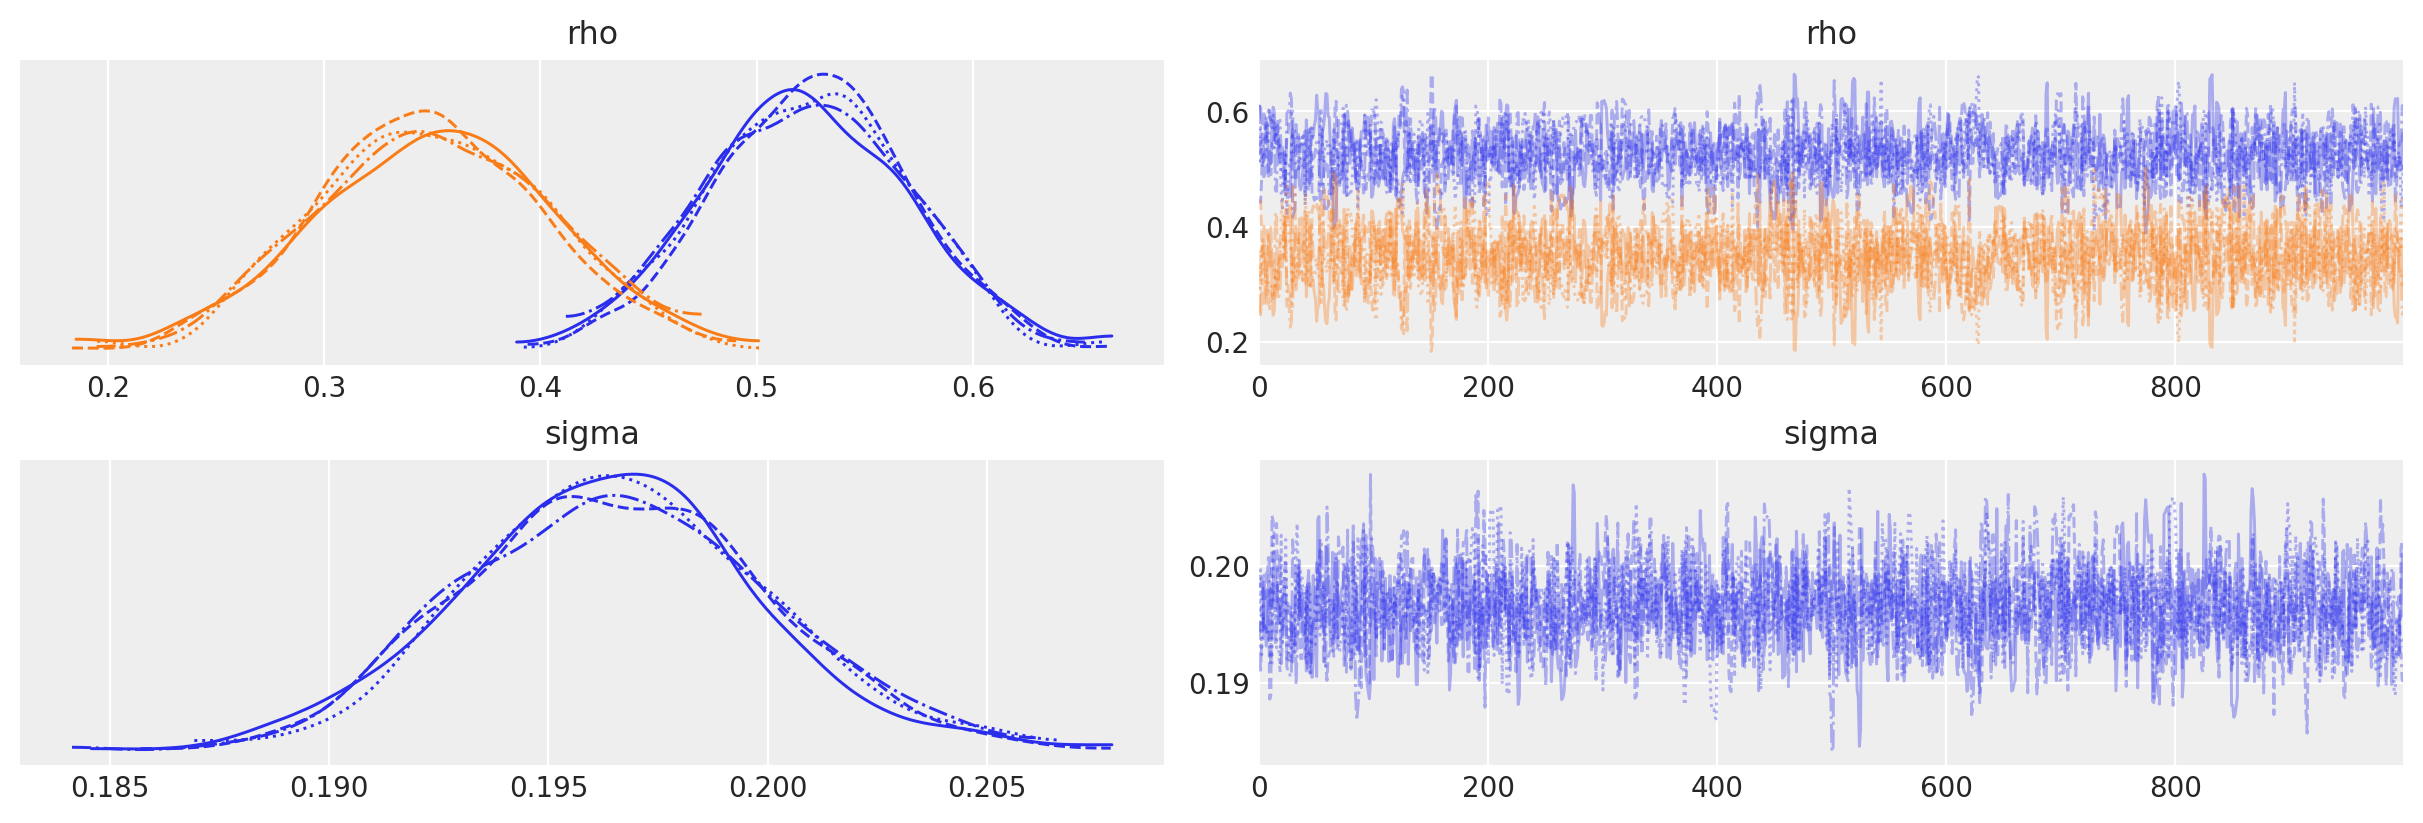

In [11]:
# AR(1) with constant
y = GDP_25_diff_norm.T

with pm.Model() as ar1wc:
    rho = pm.Normal("rho", 0.0, 1.0, shape=2)
    sigma = pm.HalfNormal("sigma", 3)
    likelihood = pm.AR(
        "ar1wc", rho=rho, sigma=sigma, constant=True, init_dist=pm.Normal.dist(0, 10), observed=y
    )

    idata_ar1wc = pm.sample(
        1000,
        tune=2000,
        target_accept=0.9,
        random_seed=RANDOM_SEED,
    )

    idata_ar1wc.extend(pm.compute_log_likelihood(idata_ar1wc)) # calcule la log_likelihood pour chaque chain x draw x série (ar_dim_0)

az.plot_trace(
    idata_ar1wc
);

In [12]:
# Stats des coefs
az.summary(idata_ar1wc)

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
rho[0]  0.524  0.046   0.441    0.612      0.001    0.001    1222.0    1208.0   
rho[1]  0.350  0.053   0.251    0.447      0.002    0.001    1218.0    1277.0   
sigma   0.197  0.003   0.190    0.203      0.000    0.000    1789.0    1643.0   

        r_hat  
rho[0]    1.0  
rho[1]    1.0  
sigma     1.0

In [13]:
# Log_likelihood sommée sur les 71 séries, moyenne entre les 4 x 1000 tirages
idata_ar1wc.log_likelihood.ar1wc.sum(["ar1wc_dim_0"]).mean(["chain","draw"]).values

array(111.21161228)

Computing ... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00

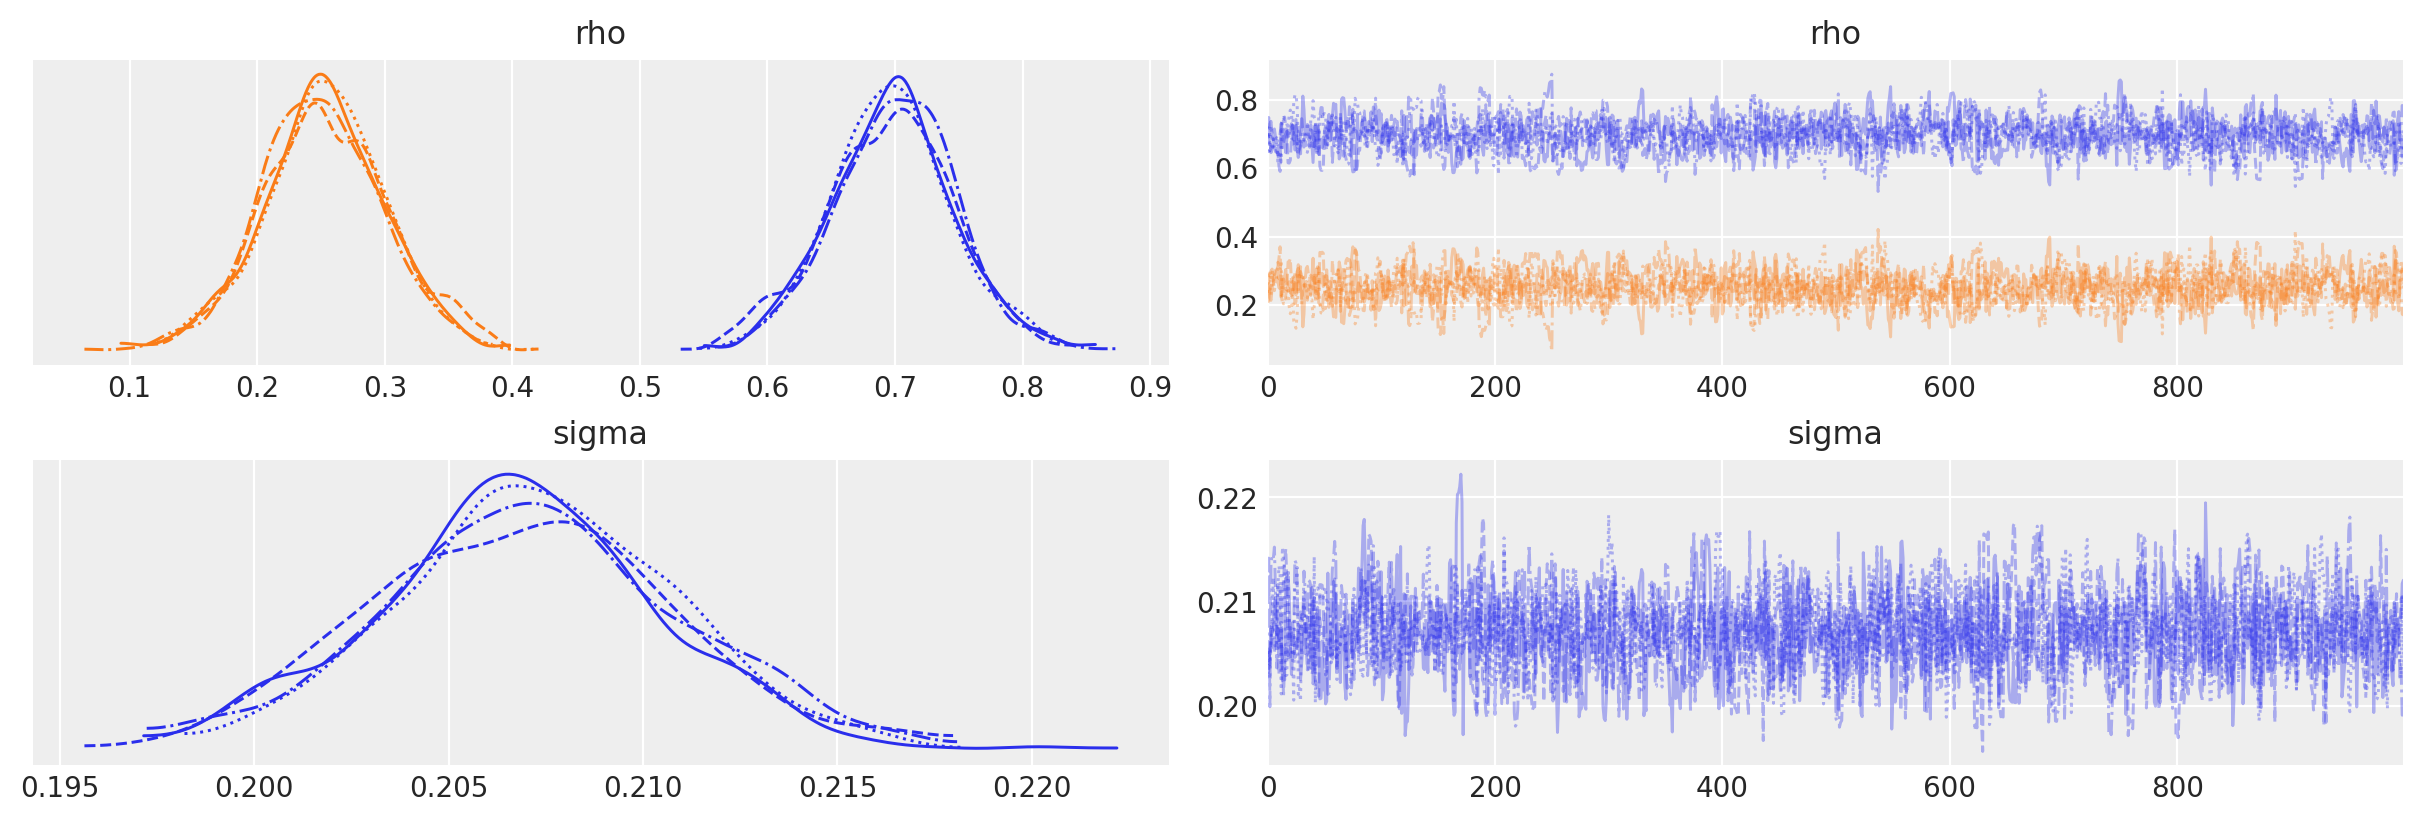

In [14]:
# AR(2) no constant
y = GDP_25_diff_norm.T

with pm.Model() as ar2nc:
    rho = pm.Normal("rho", 0.0, 1.0, shape=2)
    sigma = pm.HalfNormal("sigma", 3)
    likelihood = pm.AR(
        "ar2nc", rho=rho, sigma=sigma, constant=False, init_dist=pm.Normal.dist(0, 10), observed=y
    )

    idata_ar2nc = pm.sample(
        1000,
        tune=2000,
        target_accept=0.9,
        random_seed=RANDOM_SEED,
    )
    
    idata_ar2nc.extend(pm.compute_log_likelihood(idata_ar2nc)) # calcule la log_likelihood pour chaque chain x draw x série (ar_dim_0)
    
az.plot_trace(
    idata_ar2nc
);

In [15]:
# Stats des coefs
az.summary(idata_ar2nc)

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
rho[0]  0.698  0.048   0.597    0.784      0.002    0.001    1004.0    1292.0   
rho[1]  0.252  0.048   0.156    0.343      0.002    0.001    1001.0    1287.0   
sigma   0.207  0.004   0.200    0.214      0.000    0.000    1742.0    1463.0   

        r_hat  
rho[0]    1.0  
rho[1]    1.0  
sigma     1.0

In [16]:
# Log_likelihood sommée sur les 71 séries, moyenne entre les 4 x 1000 tirages
idata_ar2nc.log_likelihood.ar2nc.sum(["ar2nc_dim_0"]).mean(["chain","draw"]).values

array(-214.18957635)

Computing ... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00

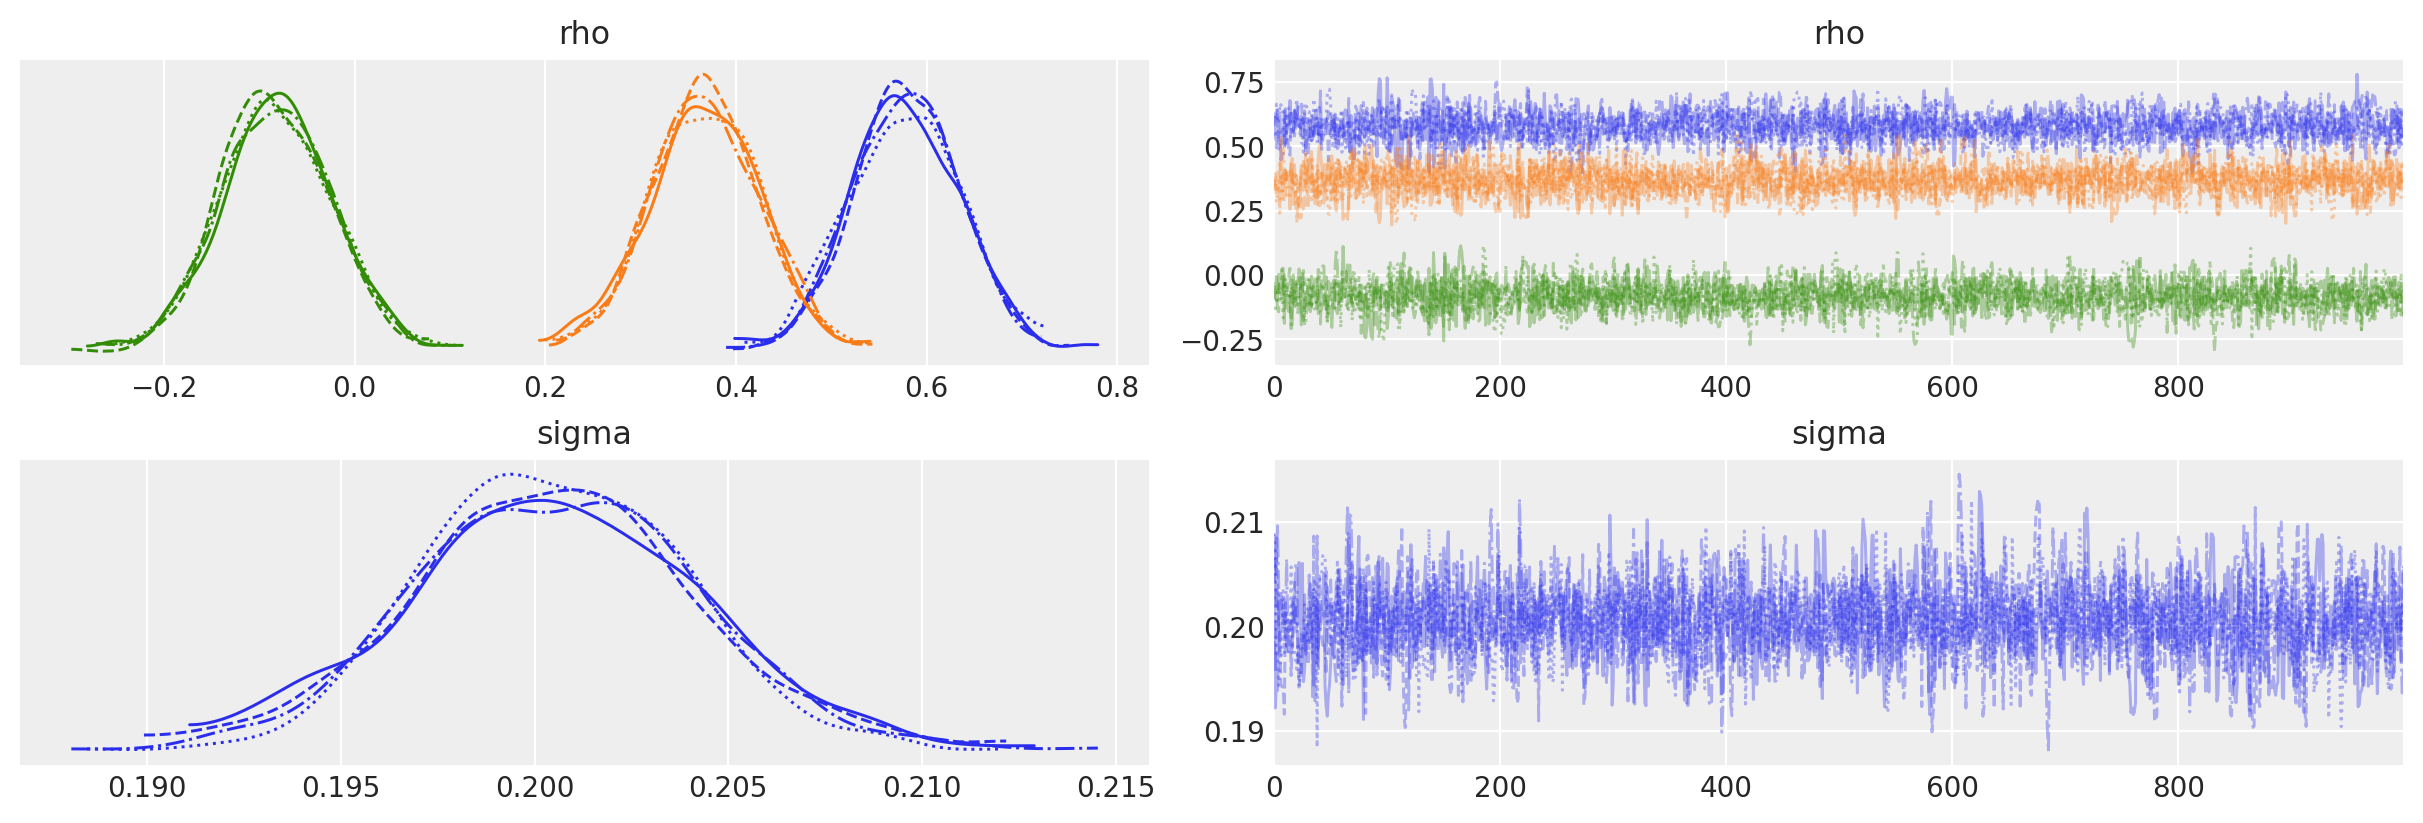

In [17]:
# AR(2) with constant
y = GDP_25_diff_norm.T

with pm.Model() as ar2wc:
    rho = pm.Normal("rho", 0.0, 1.0, shape=3)
    sigma = pm.HalfNormal("sigma", 3)
    likelihood = pm.AR(
        "ar2wc", rho=rho, sigma=sigma, constant=True, init_dist=pm.Normal.dist(0, 10), observed=y
    )

    idata_ar2wc = pm.sample(
        1000,
        tune=2000,
        target_accept=0.9,
        random_seed=RANDOM_SEED,
    )

    idata_ar2wc.extend(pm.compute_log_likelihood(idata_ar2wc)) # calcule la log_likelihood pour chaque chain x draw x série (ar_dim_0)
    
az.plot_trace(
    idata_ar2wc
);

In [18]:
# Stats des coefs
az.summary(idata_ar2wc)

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
rho[0]  0.578  0.057   0.476    0.687      0.001    0.001    1984.0    1928.0   
rho[1]  0.368  0.057   0.268    0.486      0.001    0.001    2107.0    1822.0   
rho[2] -0.082  0.058  -0.189    0.029      0.001    0.001    2310.0    1840.0   
sigma   0.201  0.004   0.194    0.207      0.000    0.000    2399.0    1561.0   

        r_hat  
rho[0]    1.0  
rho[1]    1.0  
rho[2]    1.0  
sigma     1.0

In [19]:
# Log_likelihood sommée sur les 71 séries, moyenne entre les 4 x 1000 tirages
idata_ar2wc.log_likelihood.ar2wc.sum(["ar2wc_dim_0"]).mean(["chain","draw"]).values

array(-164.28454964)

### Série growth

Computing ... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00

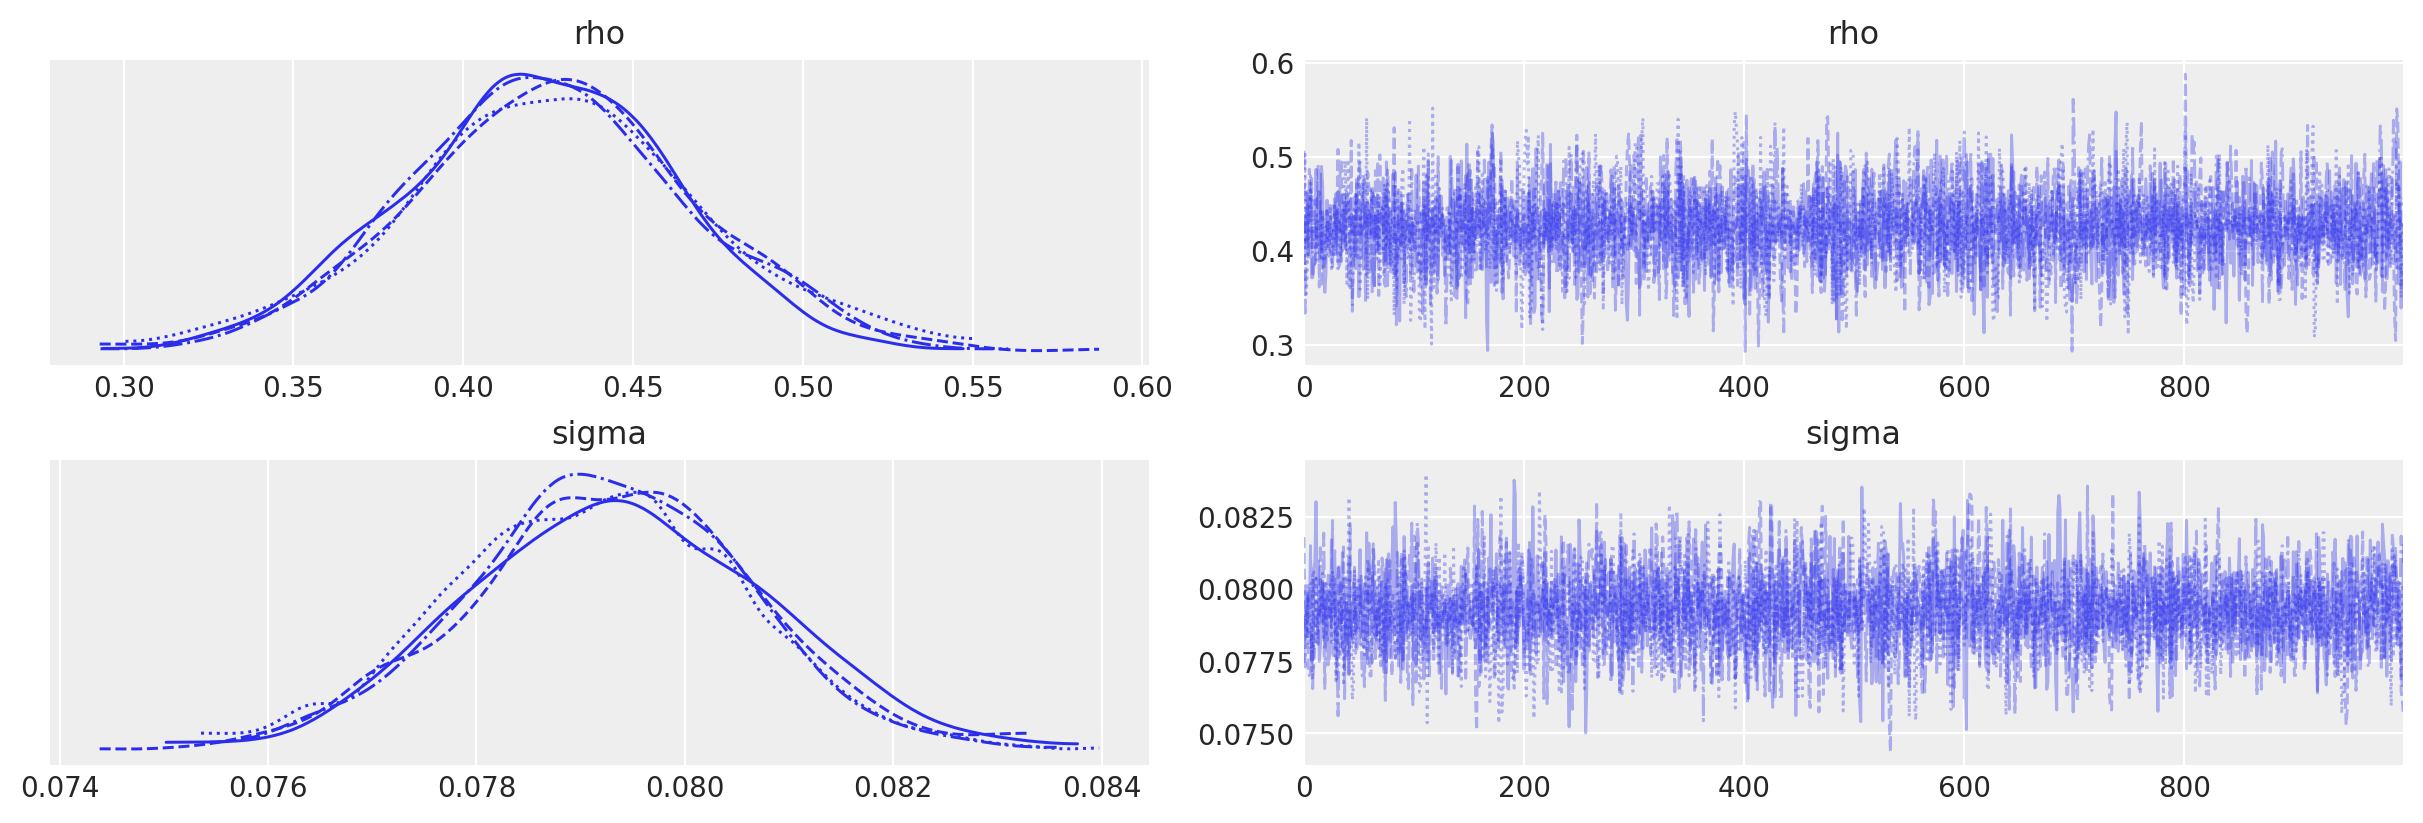

In [21]:
# AR(1) no constant
y = GDP_25_growth.T # NB : il faut que les pays soient en lignes (df NxT)

with pm.Model() as ar1nc:
    rho = pm.Normal("rho", 0.0, 1.0, shape=1)
    sigma = pm.HalfNormal("sigma", 3)
    likelihood = pm.AR(
        "ar1nc", rho=rho, sigma=sigma, constant=False, init_dist=pm.Normal.dist(0, 10), observed=y
    )

    idata_ar1nc = pm.sample(
        1000,
        tune=2000,
        target_accept=0.9,
        random_seed=RANDOM_SEED,
    )

    idata_ar1nc.extend(pm.compute_log_likelihood(idata_ar1nc)) # calcule la log_likelihood pour chaque chain x draw x série (ar_dim_0)

az.plot_trace(
    idata_ar1nc
);

In [22]:
# Stats des coefs
az.summary(idata_ar1nc)

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
rho[0]  0.425  0.042   0.346    0.503      0.001      0.0    3986.0    2776.0   
sigma   0.079  0.001   0.077    0.082      0.000      0.0    3665.0    2997.0   

        r_hat  
rho[0]    1.0  
sigma     1.0

In [23]:
# Log_likelihood sommée sur les 71 séries, moyenne entre les 4 x 1000 tirages
idata_ar1nc.log_likelihood.ar1nc.sum(["ar1nc_dim_0"]).mean(["chain","draw"]).values

array(1594.10182791)

Computing ... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00

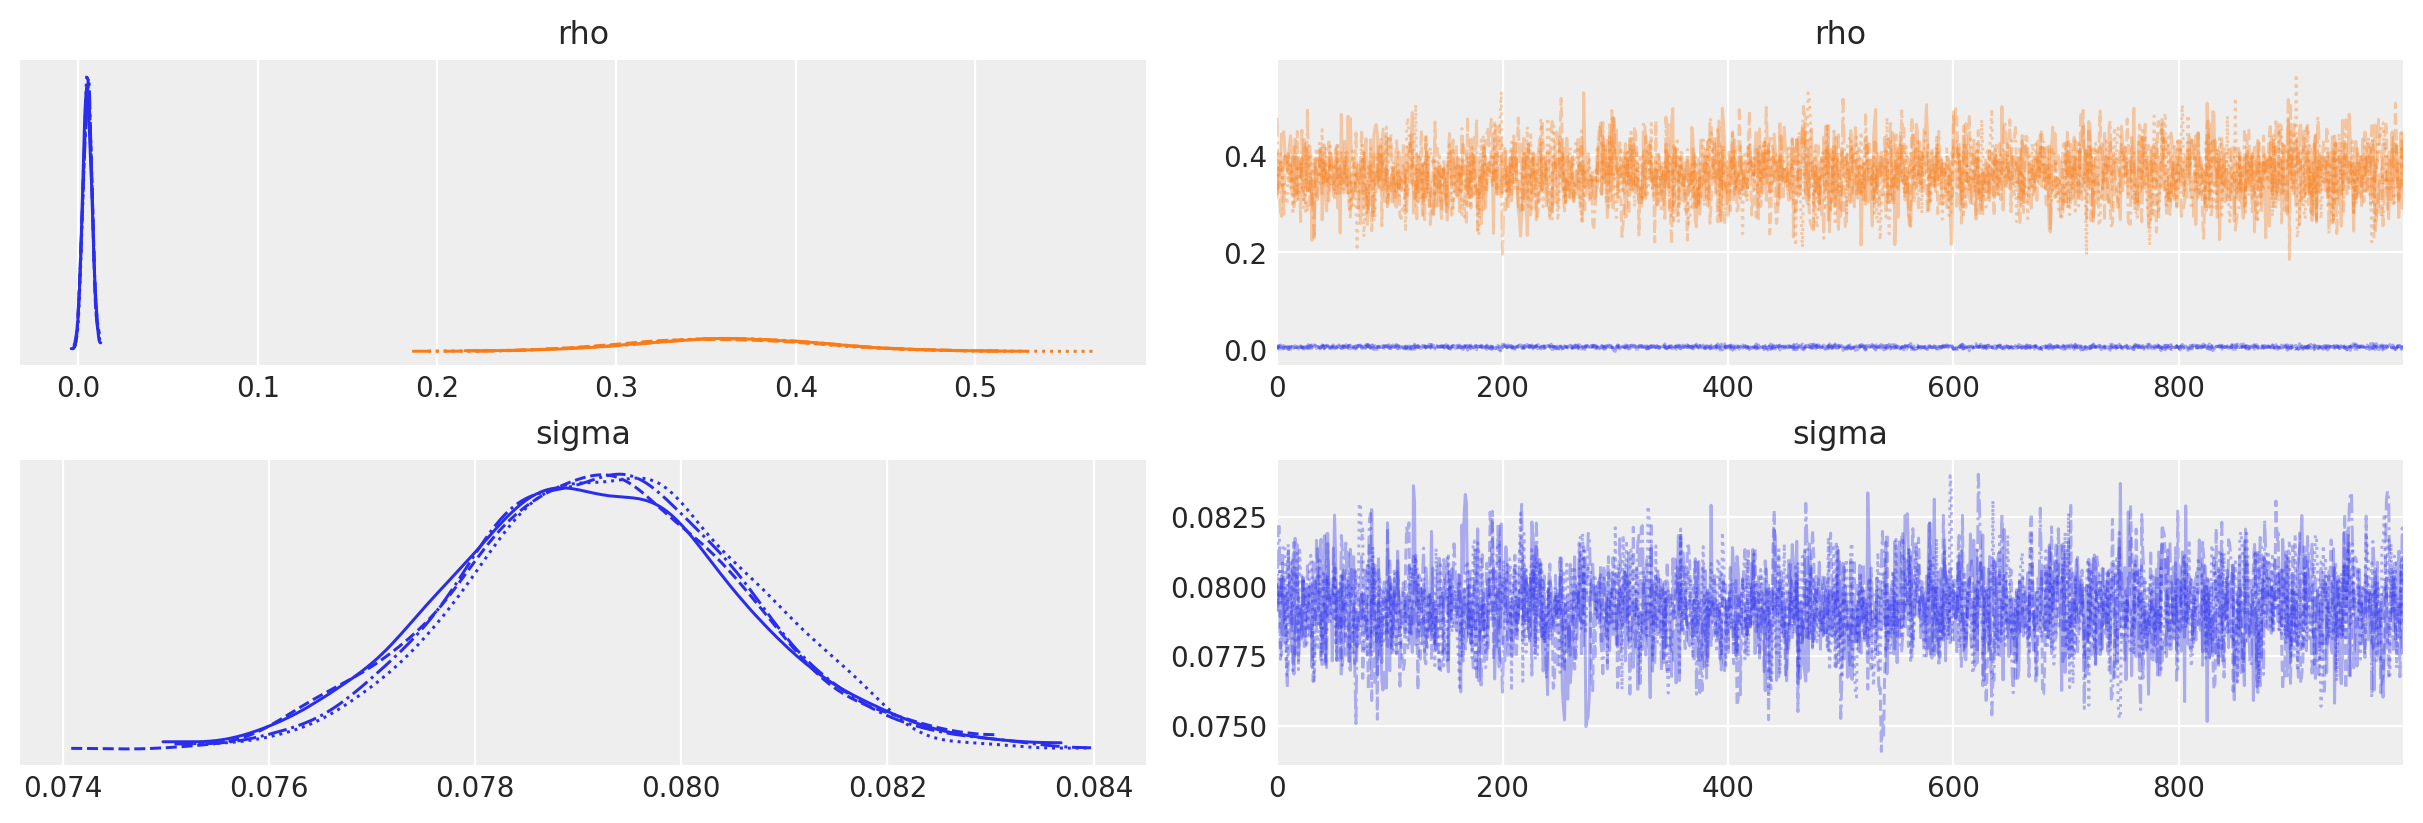

In [24]:
# AR(1) with constant
y = GDP_25_growth.T

with pm.Model() as ar1wc:
    rho = pm.Normal("rho", 0.0, 1.0, shape=2)
    sigma = pm.HalfNormal("sigma", 3)
    likelihood = pm.AR(
        "ar1wc", rho=rho, sigma=sigma, constant=True, init_dist=pm.Normal.dist(0, 10), observed=y
    )

    idata_ar1wc = pm.sample(
        1000,
        tune=2000,
        target_accept=0.9,
        random_seed=RANDOM_SEED,
    )

    idata_ar1wc.extend(pm.compute_log_likelihood(idata_ar1wc)) # calcule la log_likelihood pour chaque chain x draw x série (ar_dim_0)

az.plot_trace(
    idata_ar1wc
);

In [25]:
# Stats des coefs
az.summary(idata_ar1wc)

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
rho[0]  0.005  0.002   0.000    0.010      0.000    0.000    2631.0    2792.0   
rho[1]  0.362  0.052   0.258    0.455      0.001    0.001    2573.0    2812.0   
sigma   0.079  0.001   0.077    0.082      0.000    0.000    2385.0    2412.0   

        r_hat  
rho[0]    1.0  
rho[1]    1.0  
sigma     1.0

In [26]:
# Log_likelihood sommée sur les 71 séries, moyenne entre les 4 x 1000 tirages
idata_ar1wc.log_likelihood.ar1wc.sum(["ar1wc_dim_0"]).mean(["chain","draw"]).values

array(1595.54102569)

Computing ... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00

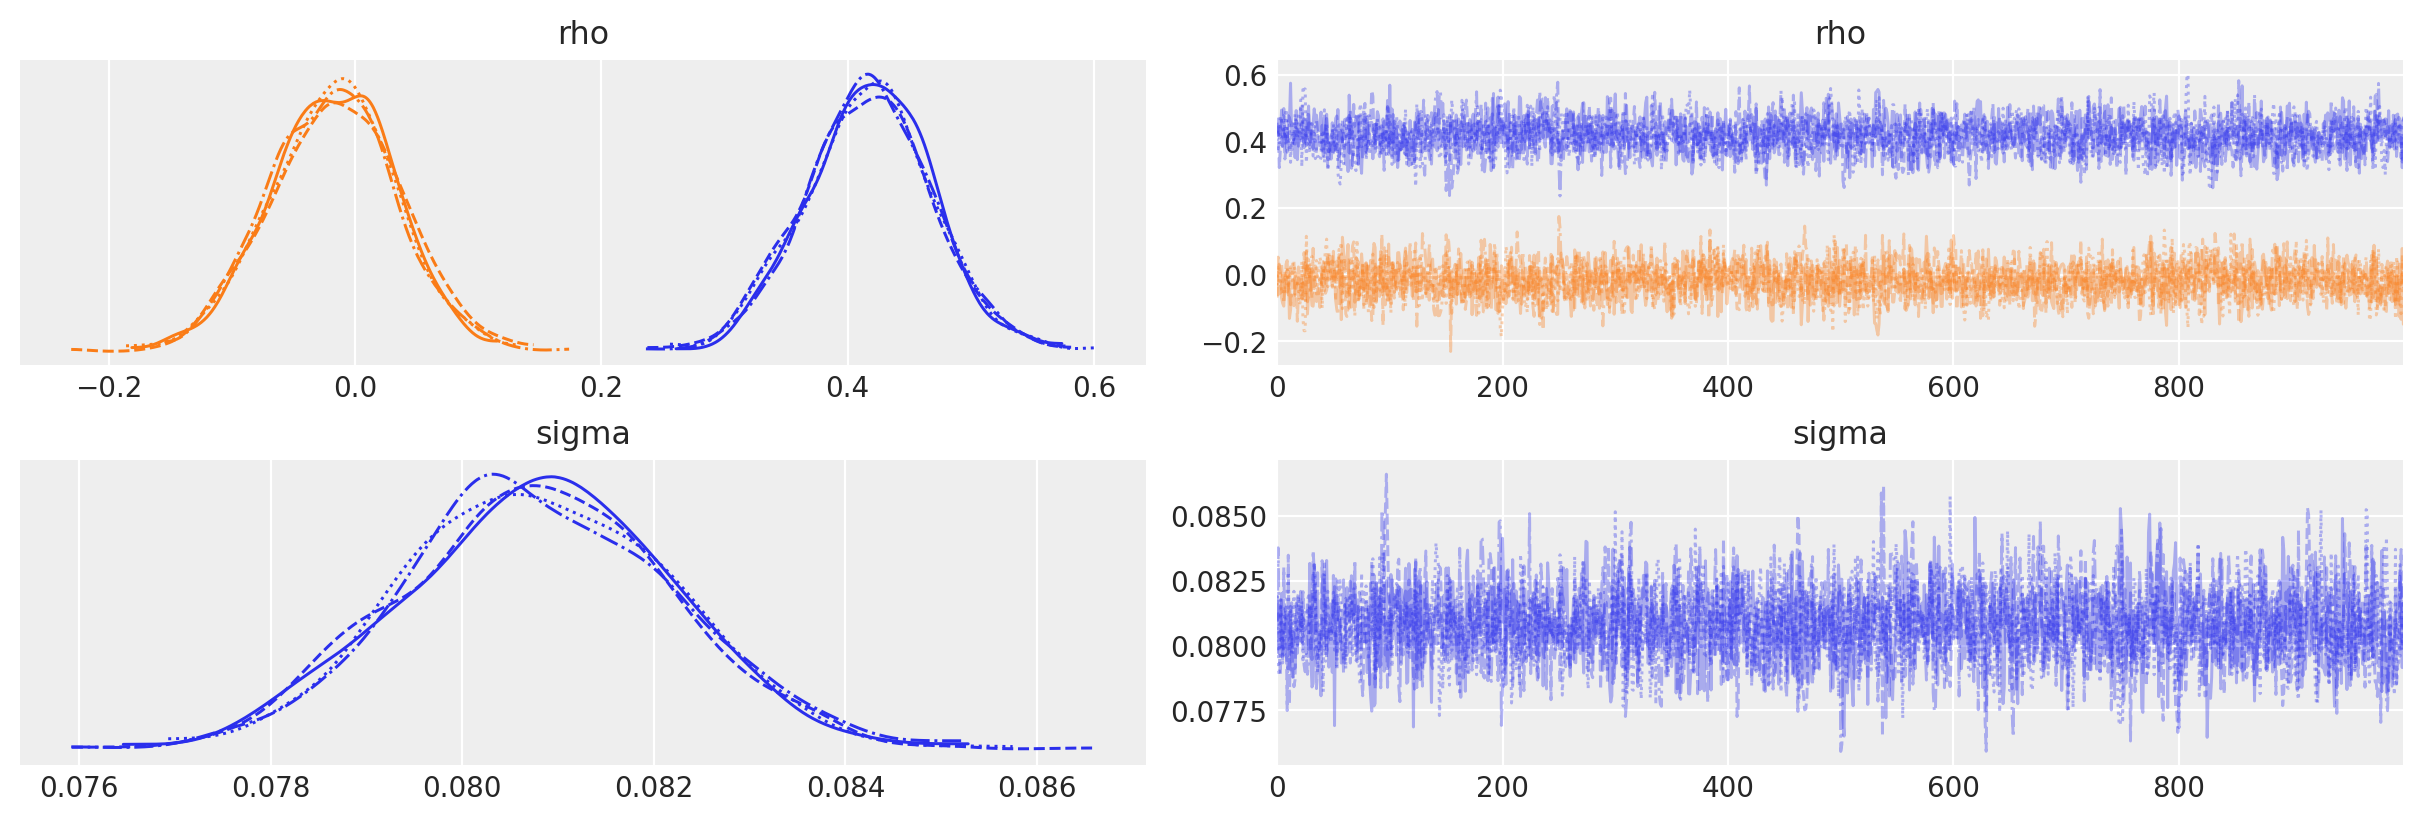

In [27]:
# AR(2) no constant
y = GDP_25_growth.T

with pm.Model() as ar2nc:
    rho = pm.Normal("rho", 0.0, 1.0, shape=2)
    sigma = pm.HalfNormal("sigma", 3)
    likelihood = pm.AR(
        "ar2nc", rho=rho, sigma=sigma, constant=False, init_dist=pm.Normal.dist(0, 10), observed=y
    )

    idata_ar2nc = pm.sample(
        1000,
        tune=2000,
        target_accept=0.9,
        random_seed=RANDOM_SEED,
    )
    
    idata_ar2nc.extend(pm.compute_log_likelihood(idata_ar2nc)) # calcule la log_likelihood pour chaque chain x draw x série (ar_dim_0)
    
az.plot_trace(
    idata_ar2nc
);

In [28]:
# Stats des coefs
az.summary(idata_ar2nc)

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
rho[0]  0.417  0.051   0.318    0.510      0.001    0.001    2226.0    2443.0   
rho[1] -0.017  0.051  -0.109    0.081      0.001    0.001    2351.0    2430.0   
sigma   0.081  0.001   0.078    0.084      0.000    0.000    3018.0    2740.0   

        r_hat  
rho[0]    1.0  
rho[1]    1.0  
sigma     1.0

In [29]:
# Log_likelihood sommée sur les 71 séries, moyenne entre les 4 x 1000 tirages
idata_ar2nc.log_likelihood.ar2nc.sum(["ar2nc_dim_0"]).mean(["chain","draw"]).values

array(1257.22034788)

Computing ... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00

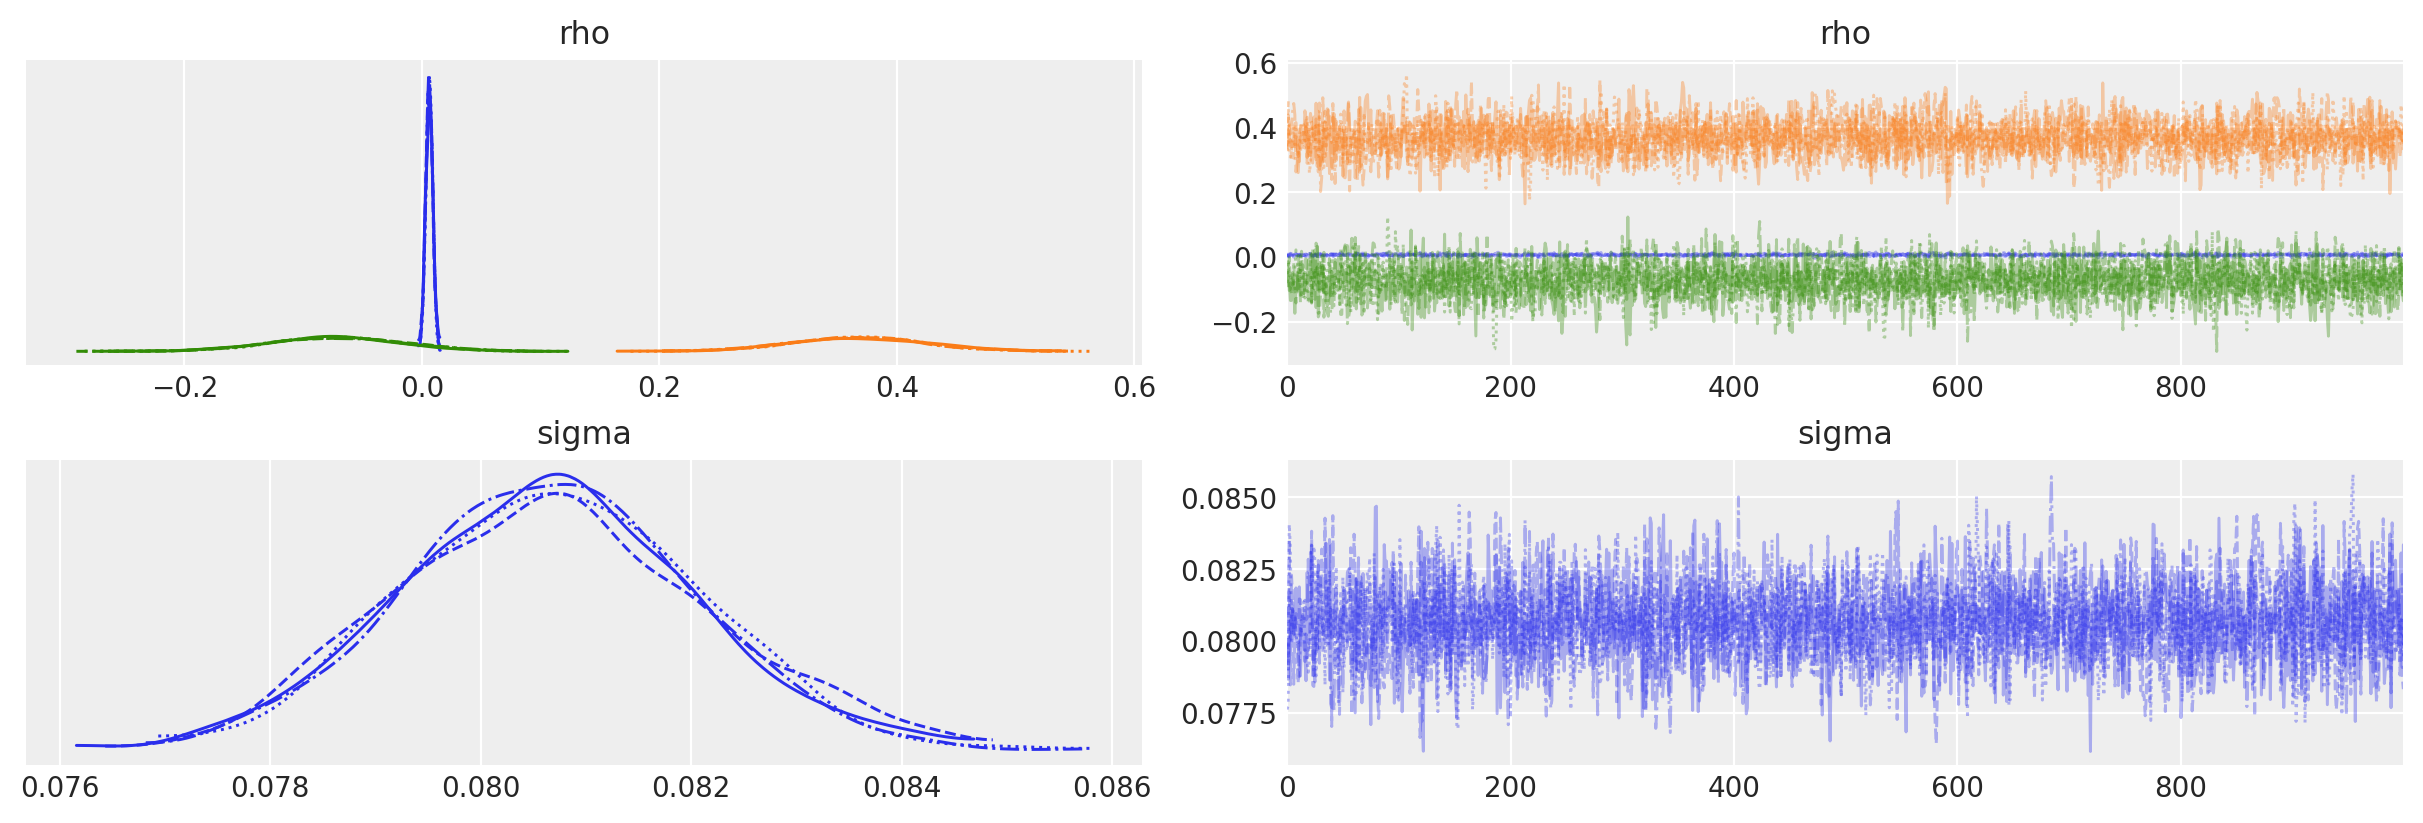

In [30]:
# AR(2) with constant
y = GDP_25_growth.T

with pm.Model() as ar2wc:
    rho = pm.Normal("rho", 0.0, 1.0, shape=3)
    sigma = pm.HalfNormal("sigma", 3)
    likelihood = pm.AR(
        "ar2wc", rho=rho, sigma=sigma, constant=True, init_dist=pm.Normal.dist(0, 10), observed=y
    )

    idata_ar2wc = pm.sample(
        1000,
        tune=2000,
        target_accept=0.9,
        random_seed=RANDOM_SEED,
    )

    idata_ar2wc.extend(pm.compute_log_likelihood(idata_ar2wc)) # calcule la log_likelihood pour chaque chain x draw x série (ar_dim_0)
    
az.plot_trace(
    idata_ar2wc
);

In [31]:
# Stats des coefs
az.summary(idata_ar2wc)

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
rho[0]  0.006  0.003   0.001    0.012      0.000    0.000    3132.0    2809.0   
rho[1]  0.368  0.056   0.261    0.476      0.001    0.001    3167.0    2570.0   
rho[2] -0.072  0.056  -0.178    0.030      0.001    0.001    3601.0    2901.0   
sigma   0.081  0.001   0.078    0.083      0.000    0.000    3516.0    2624.0   

        r_hat  
rho[0]    1.0  
rho[1]    1.0  
rho[2]    1.0  
sigma     1.0

In [32]:
# Log_likelihood sommée sur les 71 séries, moyenne entre les 4 x 1000 tirages
idata_ar2wc.log_likelihood.ar2wc.sum(["ar2wc_dim_0"]).mean(["chain","draw"]).values

array(1259.06444314)

## Estimation AR(1) avec constante

In [34]:
def initialize_model_ar(y, K, e0=1.0):
    """
    Initialise les paramètres du modèle.
    y: Liste des séries temporelles [N x T]
    K: Nombre de groupes
    e0: Hyperparamètre du Dirichlet
    """
    N,T = y.shape
    eta = dirichlet.rvs([e0] * K, size=1).flatten()  # Dirichlet prior for eta
    S = np.random.choice(K, size=N)  # Random initial classification
    theta = [np.random.randn(2) for _ in range(K)]  # Paramètres pour chaque groupe theta_k=(alpha_k,beta_k)
    sigma = [np.abs(np.random.normal(loc=0, scale=3)) for _ in range(K)] # Prior de sigma = halfnormal

    return eta, S, theta, sigma

In [152]:
def ar_log_likelihood(yi, thetak, sigmak):
    """
    Calcule la vraisemblance logarithmique d'un modèle AR(p)
    theta, sigma2 : paramètres AR
    yi : série temporelle
    """
    T = len(yi)

    alpha, beta = thetak.iloc[0], thetak.iloc[1]
    sigma2 = sigmak**2

    sigma2_y1 = sigma2 / (1 - beta**2)
    mu_y1 = alpha / (1 - beta)
    
    # Log-vraisemblance pour y1
    ll_y1 = -0.5 * np.log(2 * np.pi * sigma2_y1) - 0.5 * ((yi.iloc[0] - mu_y1)**2 / sigma2_y1)
    
    # Log-vraisemblance pour y2, ..., yT
    residuals = yi.iloc[1:] - (alpha + beta * yi.iloc[:-1])
    ll_rest = -0.5 * (T-1) * np.log(2 * np.pi * sigma2) - 0.5 * np.sum(residuals**2 / sigma2)
    
    return (ll_y1 + ll_rest)

In [146]:
def ar_log_likelihood_2(yi, thetak, sigmak):
    """
    Calcule la vraisemblance logarithmique d'un modèle AR(p)
    theta, sigma2 : paramètres AR
    yi : série temporelle
    """
    T = len(yi)

    alpha, beta = thetak[0], thetak[1]
    sigma2 = sigmak**2
    
    # Log-vraisemblance pour y2, ..., yT
    residuals = yi.iloc[1:] - (alpha + beta * yi.iloc[:-1])
    ll = -0.5 * (T-1) * np.log(2 * np.pi * sigma2) - 0.5 * np.sum(residuals**2 / sigma2)
    
    return ll

In [147]:
def sample_S_ar(y, theta, sigma, eta):
    """
    Échantillonne les indicateurs de groupe S.
    y : séries temporelles
    theta : paramètres AR pour chaque groupe
    eta : probabilités de groupe
    """
    N,T = y.shape

    log_probs = np.zeros((N, K))
    
    for k in range(K):
        for i in range(N):
            log_probs[i, k] = np.log(eta[k]) + ar_log_likelihood_2(y.iloc[i,:], theta[k], sigma[k])
    
    # Normalisation pour obtenir des probabilités
    probs = np.exp(log_probs - log_probs.max(axis=1, keepdims=True))
    probs /= probs.sum(axis=1, keepdims=True)

    # Échantillonnage des groupes
    S = np.array([np.random.choice(K, p=probs[i]) for i in range(N)])
    return S

In [151]:
def estimate_ar_params(y):
    """
    Estime les paramètres AR(1) avec constante pour un ensemble de séries.
    """
    # ATTENTION : il faut s'assurer que les pays sont bien en ligne (NxT) 
    # Et qu'il n'y a pas d'autres variables dans le df

    with pm.Model() as ar1wc:
        rho = pm.Normal("rho", 0.0, 1.0, shape=2)
        sigma = pm.HalfNormal("sigma", sigma=3)
        likelihood = pm.AR(
            "ar1wc", rho=rho, sigma=sigma, constant=True, init_dist=pm.Normal.dist(0, 10), observed=y
        ) # NB : sigma correspond à la standard deviation et pas la variance (=sigma**2)

        idata_ar1wc = pm.sample(
            500,
            tune=500,
            chains=2,
            target_accept=0.9,
            random_seed=RANDOM_SEED,
            progressbar=False,
        )
       
    # Valeur moyenne des coefficients
    theta = az.summary(idata_ar1wc).iloc[0:2,0]
    sigma = az.summary(idata_ar1wc).iloc[2,0]
    
    return theta,sigma

def update_theta_ar(y, S, K):
    """
    Met à jour les paramètres AR pour chaque groupe.
    """
    theta = []
    sigma = []
    for k in range(K):
        group_data = y[S == k]  # Séries assignées au groupe k
        # ATTENTION : il faut vérifier à quoi ressemble "group_data" => pays bien en ligne ? Pas de colonne parasite ? (ex S)
        theta_k,sigma_k = estimate_ar_params(group_data)
        theta.append(theta_k)
        sigma.append(sigma_k)

    return theta,sigma

In [38]:
def update_eta_ignorance_structure(S, K, e0=1.0):
    """
    Met à jour les probabilités a priori des paramètres eta (structure d'ignorance) influencées  par la distribution actuelle des affectations S.
    """
    counts = np.bincount(S, minlength=K) + e0  # Comptes augmentés par le prior (nombre d'observations assignées à chaque groupe k + e0)
    return dirichlet.rvs(counts, size=1).flatten()

In [39]:
def mcmc_ar(y, K, num_iterations, e0=1.0):
    """
    Exécute une chaîne MCMC pour estimer les paramètres du modèle AR(p) avec structure d'ignorance pour eta.
    y : séries temporelles (array [N x T])
    K : nombre de groupes
    p : ordre AR
    num_iterations : nombre d'itérations de MCMC
    e0 : hyperparamètre de la distribution Dirichlet pour eta
    """
    
    # Initialisation des paramètres
    eta, S, theta, sigma = initialize_model_ar(y, K, e0)

    for iter in range(num_iterations):
        # Étape (a) : Échantillonnage des groupes S
        S = sample_S_ar(y, theta, sigma, eta)

        # Étape (b.1) : Mise à jour des paramètres AR pour chaque groupe
        theta,sigma = update_theta_ar(y, S, K)

        # Étape (b.2) : Mise à jour des probabilités de groupe eta
        eta = update_eta_ignorance_structure(S, K, e0)

        # Diagnostics ou suivi des progrès
        if iter % 100 == 0:
            print(f"Iteration {iter}: eta = {eta}")

    return S, theta, sigma, eta


## Exécution sur données réelles

### Série diff + norm

In [153]:
# Exécution sur série différenciée + normalisée
np.random.seed(42)

# Conversion en tableau NumPy
y = GDP_25_diff_norm.T  # Transpose pour avoir (N, T)

K = 3  # Nombre de clusters
num_iter = 5  # Nombre d'itérations pour le MCMC

# Estimation MCMC
S_est, theta_est, sigma_est, eta_est = mcmc_ar(y, K, num_iter)

print("Classification estimée : ", S_est)
print("Paramètres des groupes : ", theta_est)
print("Paramètres eta : ", eta_est)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [rho, sigma]
Sampling 2 chains for 500 tune and 500 draw iterations (1_000 + 1_000 draws total) took 6 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [rho, sigma]
Sampling 2 chains for 500 tune and 500 draw iterations (1_000 + 1_000 draws total) took 2 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [rho, sigma]
Sampling 2 chains for 500 tune and 500 draw iterations (1_000 + 1_000 draws total) took 6 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
/tmp/ipykernel_17886/4

Iteration 0: eta = [0.04717656 0.05819533 0.89462811]


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [rho, sigma]
Sampling 2 chains for 500 tune and 500 draw iterations (1_000 + 1_000 draws total) took 5 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [rho, sigma]
Sampling 2 chains for 500 tune and 500 draw iterations (1_000 + 1_000 draws total) took 2 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [rho, sigma]
Sampling 2 chains for 500 tune and 500 draw iterations (1_00

Classification estimée :  [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Paramètres des groupes :  [rho[0]    0.051
rho[1]   -0.015
Name: mean, dtype: float64, rho[0]    0.051
rho[1]   -0.015
Name: mean, dtype: float64, rho[0]    0.528
rho[1]    0.344
Name: mean, dtype: float64]
Paramètres eta :  [0.00703043 0.00694372 0.98602585]


### Série normalisée (attention : pb de stationnarité)

In [78]:
# Exécution pour des données réelles normalisées sur l'ensemble
np.random.seed(42)

# Conversion en tableau NumPy
y_global = GDP_global_25.values.T  # Transpose pour avoir (N, T)

K = 3  # Nombre de clusters
num_iter = 500  # Nombre d'itérations pour le MCMC

# Estimation MCMC
S_est, theta_est, eta_est = mcmc_arma(y_global, K, 2, 0, num_iter)

print("Classification estimée : ", S_est)
print("Paramètres des groupes : ", theta_est)
print("Paramètres eta : ", eta_est)


Iteration 0: eta = [0.13734109 0.56517378 0.29748513]
Iteration 100: eta = [0.2842857  0.13624712 0.57946718]
Iteration 200: eta = [0.29039462 0.63451304 0.07509233]
Iteration 300: eta = [0.30630294 0.31722039 0.37647666]
Iteration 400: eta = [0.57922404 0.02641062 0.39436534]
Classification estimée :  [1 1 0 0 1 1 0 0 0 2 0 2 0 2 1 0 0 2 2 2 1 0 0 0 0 1 1 2 0 0 0 2 2 0 1 1 1
 0 1 0 2 0 1 1 2 1 1 2 0 1 0 2 0 1 0 0 1 1 1 0 1 0 0 2 2 0 1 1 2]
Paramètres des groupes :  [array([-0.47449519,  1.40787666]), array([-0.42231031,  0.51687491]), array([-1.07354007, -1.26681498])]
Paramètres eta :  [0.37201194 0.27647577 0.35151229]


In [81]:
# Exécution pour des données réelles normalisées sur l'ensemble
np.random.seed(42)

# Conversion en tableau NumPy
y = GDP_30.values.T  # Transpose pour avoir (N, T)

K = 3  # Nombre de clusters
num_iter = 500  # Nombre d'itérations pour le MCMC

# Estimation MCMC
S_est, theta_est, eta_est = mcmc_arma(y, K, 2, 0, num_iter)

print("Classification estimée : ", S_est)
print("Paramètres des groupes : ", theta_est)
print("Paramètres eta : ", eta_est)

Iteration 0: eta = [0.44378555 0.52489075 0.0313237 ]
Iteration 100: eta = [0.10782093 0.81020489 0.08197418]
Iteration 200: eta = [0.00443055 0.99327433 0.00229511]
Iteration 300: eta = [0.02644586 0.06236321 0.91119093]
Iteration 400: eta = [0.12910007 0.86849781 0.00240211]
Classification estimée :  [2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 0 2 2 2 2 2]
Paramètres des groupes :  [array([-0.26180907,  0.35715229]), array([ 0.13350516, -0.22636144]), array([-0.57130212, -1.56560738])]
Paramètres eta :  [0.05955011 0.01606546 0.92438443]


## Avec modèle logit pour la probabilité d'appartenance

À modifier possiblement : pour calculer chaque coefficient $\gamma_j$, on initialise avec une normale (ici choix de $\mathcal(N)(0,1)$) mais à creuser : comment choisir les paramètres de la loi normale?
J'ai ajouté un intercept à z car dans les coefficients du modèle logit, il est marqué qu'il faut prendre K-1 car la K_ie coordonnée est la ligne de "référence" et d+1 car on veut un intercept (d'où l'indice +1). 
On calcule l'intégrale selon la loi normale pour la likelihood étant donné qu'on a pris une logit de prior normale. 
Pour update les paramètres $\gamma$ de la logit, il est précisé dans l'article qu'on le fait via un algorithme de Metropolis Hastings car on n'a pas de forme explicite. La fonction update_gamma suit donc cette logique. 
Enfin, on utilise un MCMC pour l'échantillonnage et l'update des paramètres. 

In [13]:
import numpy as np
from scipy.stats import norm

def initialize_model_with_logit(y, z, K, d, mu_gamma=0, sigma_gamma=1):
    N, T = y.shape
    S = np.random.choice(K, size=N)  # Initial random group assignments
    theta = [np.random.randn(T) for _ in range(K)]  # Group-specific parameters
    gamma = np.random.normal(mu_gamma, sigma_gamma, size=(K - 1, d + 1))  # Logit coefficients
    return S, theta, gamma

def sample_S_with_logit(y, z, theta, gamma):
    N = len(y)
    K = len(theta)
    S = np.zeros(N, dtype=int)
    for i in range(N):
        probs = []
        for k in range(K):
            z_with_intercept = np.append(z[i], 1)  # Add intercept term
            logit_prob = np.exp(z_with_intercept @ gamma[k - 1]) if k > 0 else 1
            likelihood = norm.pdf(y[i], loc=theta[k]).prod()
            probs.append(likelihood * logit_prob)
        probs = np.array(probs) / np.sum(probs)
        S[i] = np.random.choice(K, p=probs)
    return S

def update_theta_arma(y, S, K):
    T = y.shape[1]
    theta = []
    for k in range(K):
        group_data = y[S == k]
        if len(group_data) > 0:
            theta_k = np.mean(group_data, axis=0)  # Group mean as an estimate
        else:
            theta_k = np.zeros(T)  # Default if no data assigned to group
        theta.append(theta_k)
    return theta

def update_gamma(S, z, gamma, mu_gamma=0, sigma_gamma=1, step_size=0.1):
    K, d = gamma.shape
    gamma_new = gamma.copy()
    for k in range(K):
        gamma_proposal = gamma[k] + np.random.normal(0, step_size, size=d)
        log_prior_current = -0.5 * np.sum((gamma[k] - mu_gamma) ** 2) / sigma_gamma**2
        log_prior_proposal = -0.5 * np.sum((gamma_proposal - mu_gamma) ** 2) / sigma_gamma**2

        log_likelihood_current = 0
        log_likelihood_proposal = 0
        for i in range(len(S)):
            z_with_intercept = np.append(z[i], 1)  # Add intercept for logit model
            logit_prob_current = np.exp(z_with_intercept @ gamma[k]) / (1 + np.exp(z_with_intercept @ gamma[k]))
            logit_prob_proposal = np.exp(z_with_intercept @ gamma_proposal) / (1 + np.exp(z_with_intercept @ gamma_proposal))
            log_likelihood_current += S[i] * np.log(logit_prob_current)
            log_likelihood_proposal += S[i] * np.log(logit_prob_proposal)

        log_acceptance_ratio = (log_prior_proposal + log_likelihood_proposal) - (
            log_prior_current + log_likelihood_current
        )

        if np.log(np.random.rand()) < log_acceptance_ratio:
            gamma_new[k] = gamma_proposal
    return gamma_new

def mcmc_logit(y, z, K, num_iter):
    N, d = z.shape
    S, theta, gamma = initialize_model_with_logit(y, z, K, d)
    for iteration in range(num_iter):
        S = sample_S_with_logit(y, z, theta, gamma)  # Sample S
        theta = update_theta_arma(y, S, K)  # Update theta
        gamma = update_gamma(S, z, gamma)  # Update gamma
    return S, theta, gamma

# Exécution pour des données réelles normalisées sur l'ensemble
np.random.seed(42)

# Conversion en tableau NumPy
y_global = GDP_global_25.values.T  # Transpose pour avoir (N, T)

K = 3  # Nombre de clusters
num_iter = 500  # Nombre d'itérations pour le MCMC
d = 2
z = np.random.randn(N, d)  # Exogenous variables

# Estimation MCMC
S_est, theta_est, gamma_est = mcmc_logit(y_global,z, K, num_iter)

print("Classification estimée : ", S_est)
print("Paramètres des groupes : ", theta_est)
print("Paramètres gamma : ", gamma_est)


Classification estimée :  [1 1 1 1 1 2 1 1 1 1 2 1 2 2 1 2 1 2 1 1 2 1 1 1 1 1 1 2 1 2 1 1 2 2 1 1 1
 1 1 1 2 2 2 2 1 1 1 2 1 2 1 1 1 2 1 1 1 1 1 1 1 2 2 1 2 1 1 1 1 1 1]
Paramètres des groupes :  [array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.]), array([0.04043609, 0.04101091, 0.04163687, 0.04256847, 0.04401313,
       0.04536101, 0.04688231, 0.04829583, 0.0486729 , 0.0470104 ,
       0.04859307, 0.04968587, 0.05042452, 0.05132295, 0.05234177,
       0.05338465, 0.05421808, 0.0556408 , 0.05689823, 0.05792697,
       0.05546169, 0.05877174, 0.06053192, 0.06175145, 0.04669895]), array([0.01340527, 0.01411242, 0.01496278, 0.01588369, 0.01706466,
       0.01841093, 0.02005405, 0.02205203, 0.02340757, 0.0244415 ,
       0.02651007, 0.02833431, 0.02992864, 0.03167184, 0.03356375,
       0.03563435, 0.03773366, 0.03998443, 0.04233392, 0.04435271,
       0.04418529, 0.0478131 , 0.04952853, 0.05172847, 0.04006782])]
Paramètres g

In [14]:
# Exécution pour des données réelles normalisées sur l'ensemble
np.random.seed(42)

# Conversion en tableau NumPy
y_global = GDP_30.values.T  # Transpose pour avoir (N, T)

K = 3  # Nombre de clusters
num_iter = 500  # Nombre d'itérations pour le MCMC
d = 2
z = np.random.randn(N, d)  # Exogenous variables

# Estimation MCMC
S_est, theta_est, gamma_est = mcmc_logit(y_global,z, K, num_iter)

print("Classification estimée : ", S_est)
print("Paramètres des groupes : ", theta_est)
print("Paramètres gamma : ", gamma_est)

Classification estimée :  [1 1 2 1 2 2 1 2 2 2 2 2 1 2 1 1 2 2 2 1 2 2 2 1 1 2 1 1 1 1 2 2 1 1 2 1 1
 2 1 2 2 1 2 2 1 1 2 2 1 2 2 1 1 1 2]
Paramètres des groupes :  [array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0.03828192, 0.07067898, 0.11515017, 0.14091743, 0.17076468,
       0.2178586 , 0.23709931, 0.25624925, 0.28729609, 0.33652281,
       0.38592785, 0.44505631, 0.50760076, 0.52581065, 0.47253014,
       0.52521224, 0.56077227, 0.57394264, 0.60093533, 0.63326769,
       0.67416911, 0.71048434, 0.76576541, 0.80745666, 0.84115926,
       0.76112847, 0.88858582, 0.96190914, 0.99531731, 0.43880529]), array([0.00888367, 0.04314481, 0.07693001, 0.10566241, 0.13349746,
       0.18564737, 0.21801875, 0.25320814, 0.28869648, 0.34377019,
       0.3934657 , 0.46349687, 0.5348694 , 0.56518867, 0.49681415,
       0.53783274, 0.57362593, 0.58727143, 0.61184431, 0.64623541,
       0.67978372, 0.72104

## Estimer le nombre optimal de clusters K

en utilisant une prior uniforme pour M_k : Pr(MK)= 1/Kmax
 

In [ ]:
def prior_density(theta, sigma, eta):
    log_prior = 0
    for k in range(len(eta)):
        alpha, beta = theta[k]
        log_prior += norm.logpdf(alpha, loc=0, scale=10)
        log_prior += norm.logpdf(beta, loc=0, scale=10)
        log_prior += pm.Halfnorm.logpdf(sigma[k], scale=3)
    log_prior += dirichlet.logpdf(eta, alpha=[1.0] * len(eta))
    return np.exp(log_prior)

In [ ]:
# Fonction de bridge sampling
def bridge_sampling(y, theta_samples, proposal_samples, likelihood_fn, prior_fn):
    """
    Applique le bridge sampling pour estimer la vraisemblance marginale.
    """
    N1 = len(proposal_samples)
    N2 = len(theta_samples)
    
    s1 = N1 / (N1 + N2)
    s2 = N2 / (N1 + N2)
    
    p_y = 1.0  # Initial guess for marginal likelihood
    tolerance = 1e-6
    max_iter = 100
    
    for _ in range(max_iter):
        numerator = 0
        denominator = 0
        
        for theta in proposal_samples:
            numerator += likelihood_fn(y, theta) * prior_fn(theta) / (s1 * likelihood_fn(y, theta) * prior_fn(theta) + s2 * p_y)
        numerator /= N1
        
        for theta in theta_samples:
            denominator += 1 / (s1 * likelihood_fn(y, theta) * prior_fn(theta) + s2 * p_y)
        denominator /= N2
        
        new_p_y = numerator / denominator
        if np.abs(new_p_y - p_y) < tolerance:
            break
        p_y = new_p_y
    
    return p_y

In [ ]:
# Algorithme MCMC avec choix du nombre optimal de clusters
def mcmc_ar_bridge(y, K_max, num_iterations, e0=1.0):
    """
    Exécute une chaîne MCMC pour estimer les paramètres et le nombre optimal de clusters.
    """
    N, T = y.shape
    marginal_likelihoods = []
    saved_parameters = []
    
    for K in range(1, K_max + 1):
        eta, S, theta, sigma = initialize_model_ar(y, K, e0)
        
        for _ in range(num_iterations):
            S = sample_S_ar(y, theta, sigma, eta, K)
            theta, sigma = update_theta_ar(y, S, K)
            eta = update_eta_ignorance_structure(S, K, e0)
        
        # Calcul de la vraisemblance marginale via bridge sampling
        proposal_samples = [np.random.randn(2) for _ in range(100)]  # Échantillons de la distribution de proposition
        marginal_likelihood = bridge_sampling(
            y,
            theta,
            proposal_samples,
            lambda y, theta: np.exp(ar_log_likelihood(y, S, theta, sigma)),
            lambda theta: prior_density(theta, sigma, eta)
        )
        marginal_likelihoods.append(marginal_likelihood)

        # Sauvegarder les paramètres
        saved_parameters.append((K, eta, S, theta, sigma))
    
    # Choix du K optimal
    best_K_idx = np.argmax(marginal_likelihoods)
    best_K = best_K_idx + 1
    best_parameters = saved_parameters[best_K_idx]

    return best_K, marginal_likelihoods, best_parameters